# **PROBLEM STATEMENT :**
## To predict the CO2 emissions (g/km) from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle.

# **DATASET :**

The dataset has been taken from the Canada Government official website link is given below.
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

This dataset provide model-specific fuel consumption in (L/100 km) and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada over the period of **2010-2023**.



# **Introduction to Data**

The details are listed below along with the few abbreviations that has been used in this data for different features.

**1. Make :** Brand of the car.

**2. Model :** Specific model of the car used

**4WD/4X4** = Four-wheel drive

**AWD** = All-wheel drive

**FFV** = Flexible-fuel vehicle

**SWB** = Short wheelbase

**LWB** = Long wheelbase

**EWB** = Extended wheelbase

**3. Vehicle Class :** Size and utility of the vehicle

**4. Engine Size :** The size of an engine and refers to the total volume of air and fuel that's pushed through the engine by its cylinders.

**5. Cylinders :** Number of cylinders

**6. Transmission :** Type of gear

**A** = automatic

**AM** = automated manual

**AS** = automatic with select shift

**AV** = continuously variable

**M** = manual

**7. Fuel type :** Type of fuel used

**X** = regular gasoline

**Z** = premium gasoline

**D** = diesel

**E** = ethanol (E85)

**N** = natural gas

**8. Fuel Consumption City (L/100 km) :** The fuel consumption ratings in City are shown in litres per 100 kilometres (L/100 km).

**9. Fuel Consumption Hwy (L/100 km) :** The fuel consumption ratings in Highway are shown in litres per 100 kilometres (L/100 km).

**10. Fuel Consumption Comb (L/100 km) :** The combined rating (55% city, 45% hwy) is shown in L/100 km.

**11. Fuel Consumption Comb (mpg) :** The combined fuel consumption is shown in miles per gallon(mpg).

**12. CO2 Emissions(g/km) :** Amount of CO2 Emissions by a vehicle in (g/km).




# **Importing all the library**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Importing and reading the excel**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fuel_con = pd.read_excel('/content/drive/MyDrive/CO2 EMISSION.xlsx')

# **Checking all the infomation**

In [ ]:
fuel_con.head()

,Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [ ]:
fuel_con.tail()

,Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
14535,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215
14536,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218
14537,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233
14538,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223
14539,2023,Volvo,XC90 B6 AWD,SUV: Standard,2.0,4,AS8,Z,11.9,9.1,10.6,27,249


In [ ]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14540 entries, 0 to 14539
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              14540 non-null  int64  
 1   Make                              14540 non-null  object 
 2   Model                             14540 non-null  object 
 3   Vehicle Class                     14540 non-null  object 
 4   Engine Size(L)                    14540 non-null  float64
 5   Cylinders                         14540 non-null  int64  
 6   Transmission                      14540 non-null  object 
 7   Fuel Type                         14540 non-null  object 
 8   Fuel Consumption City (L/100 km)  14540 non-null  float64
 9   Fuel Consumption Hwy (L/100 km)   14540 non-null  float64
 10  Fuel Consumption Comb (L/100 km)  14540 non-null  float64
 11  Fuel Consumption Comb (mpg)       14540 non-null  int64  
 12  CO2 

In [ ]:
fuel_con.shape

(14540, 13)

## **To check column names**

In [ ]:
fuel_con.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

# **To check for null values**

In [ ]:
fuel_con.isnull().sum()

Year                                0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# **Analysing the categorical values**




In [ ]:
fuel_con["Make"].nunique()

81

In [ ]:
fuel_con["Make"].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUGATTI',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FERRARI',
       'FORD', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR',
       'JEEP', 'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN',
       'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI',
       'NISSAN', 'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SMART', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'SCION', 'FIAT', 'RAM',
       'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura', 'Alfa Romeo',
       'Aston Martin', 'Audi', 'Bentley', 'Bugatti', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Genesis', 'Honda',
       'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [ ]:
fuel_con["Model"].nunique()

3075

In [ ]:
fuel_con["Vehicle Class"].nunique()

32

In [ ]:
fuel_con["Vehicle Class"].unique()

array(['COMPACT', 'SUV', 'MID-SIZE', 'MINICOMPACT', 'TWO-SEATER',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'FULL-SIZE', 'PICKUP TRUCK - STANDARD', 'PICKUP TRUCK - SMALL',
       'VAN - CARGO', 'VAN - PASSENGER', 'MINIVAN',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV - STANDARD',
       'Compact', 'SUV: Small', 'Two-seater', 'Mid-size', 'Minicompact',
       'Subcompact', 'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [ ]:
fuel_con["Transmission"].nunique()

28

In [ ]:
fuel_con["Transmission"].unique()

array(['AS5', 'M5', 'M6', 'AS6', 'AM6', 'AV', 'AS7', 'A6', 'A8', 'A7',
       'AM7', 'A4', 'A5', 'AS4', 'AS8', 'M7', 'AV7', 'AV8', 'AV6', 'AM5',
       'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10', 'AV1'],
      dtype=object)

### **Mapping similar labels into a single label for Transmission column**

In [ ]:
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["M5", "M6", "M7"]), "Manual", fuel_con["Transmission"])

In [ ]:
fuel_con["Transmission"].unique()

array(['Automatic with Select Shift', 'Manual', 'Automated Manual',
       'Continuously Variable', 'Automatic', 'AV1'], dtype=object)

In [ ]:
fuel_con["Fuel Type"].nunique()

5

In [ ]:
fuel_con["Fuel Type"].unique()

array(['X', 'Z', 'D', 'E', 'N'], dtype=object)

# **`Changing the values to meaningful names`**

In [ ]:
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="Z", "Premium Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="X", "Regular Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="D", "Diesel", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="E", "Ethanol(E85)", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="N", "Natural Gas", fuel_con["Fuel Type"])

In [ ]:
fuel_con["Fuel Type"].unique()

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [ ]:
fuel_con.head()

,Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4,Automatic with Select Shift,Regular Gasoline,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,Manual,Regular Gasoline,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,Manual,Premium Gasoline,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,Automatic with Select Shift,Premium Gasoline,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,Automatic with Select Shift,Premium Gasoline,13.2,10.3,11.9,24,274


# **Frequency Distribution of different Categorical Variables**

#### ***1. Feature : Make***

Make
-------------  ---
BMW            997
CHEVROLET      782
GMC            776
FORD           670
Ford           542
MERCEDES-BENZ  473
Chevrolet      460
PORSCHE        428
Mercedes-Benz  387
TOYOTA         377
MINI           376
Porsche        336
AUDI           327
DODGE          309
NISSAN         307
Toyota         288
VOLKSWAGEN     280
KIA            272
Audi           240
HYUNDAI        232
JEEP           229
HONDA          209
MAZDA          204
Jeep           202
CADILLAC       198
LEXUS          193
SUBARU         190
Nissan         183
Honda          178
Hyundai        174
Lexus          159
Dodge          159
VOLVO          157
Mazda          152
Kia            151
INFINITI       146
MITSUBISHI     139
CHRYSLER       135
Cadillac       134
JAGUAR         133
BUICK          123
Jaguar         118
Land Rover     115
Volkswagen     114
Subaru         107
LINCOLN        106
FIAT            86
Ram             86
ACURA           86
Volvo           81
RAM             78
Maserat

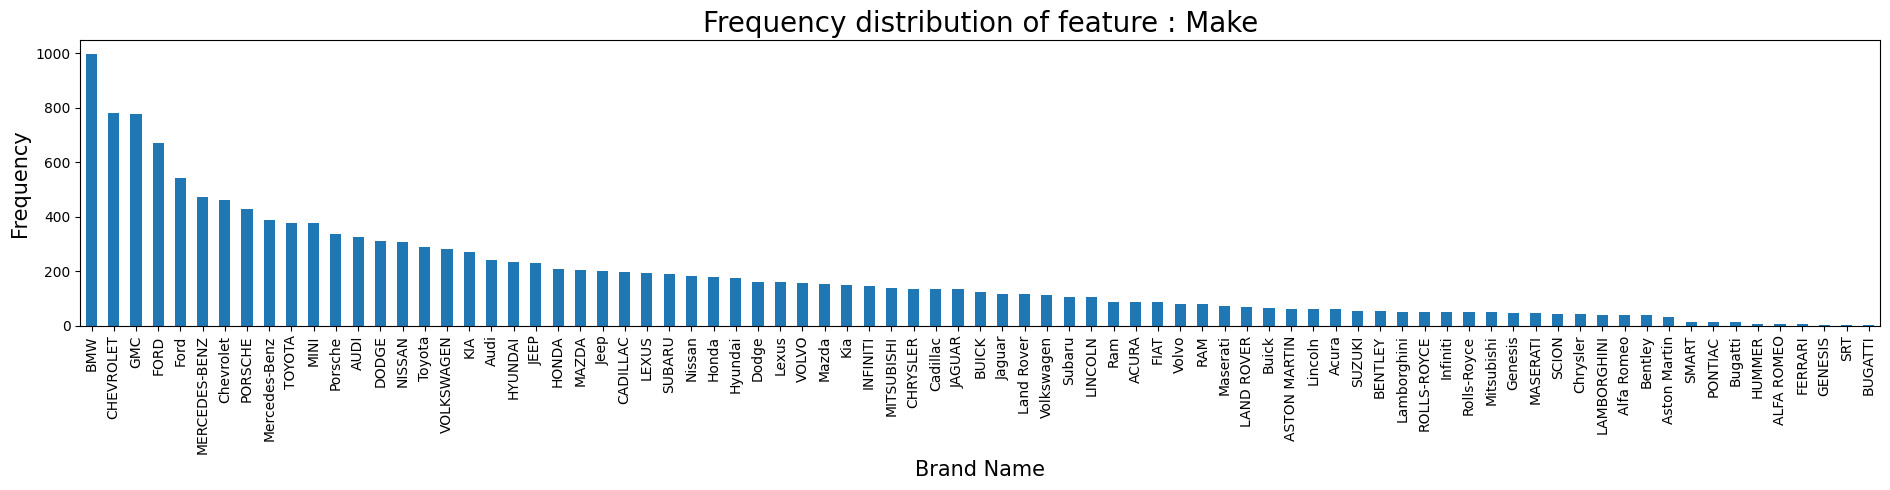

In [ ]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(fuel_con.Make.value_counts())))

plt.figure(figsize=(19,5));
fuel_con.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ***2. Feature : Model***
#### *Working with only the Top 20 model.*

Top 20 car models out of total 3075 car models
-------------  --
F-150 FFV      44
SILVERADO 4WD  43
MUSTANG        43
SILVERADO      43
SIERRA         43
SIERRA 4WD     43
JETTA          39
F-150 FFV 4X4  36
Sierra 4WD     31
Silverado 4WD  31
TACOMA 4WD     31
FOCUS FFV      30
FORTE          29
COROLLA        29
PATRIOT        29
COMPASS        29
FORTE KOUP     28
SOUL           28
Mustang        27
F-150 4X4      27
-------------  --


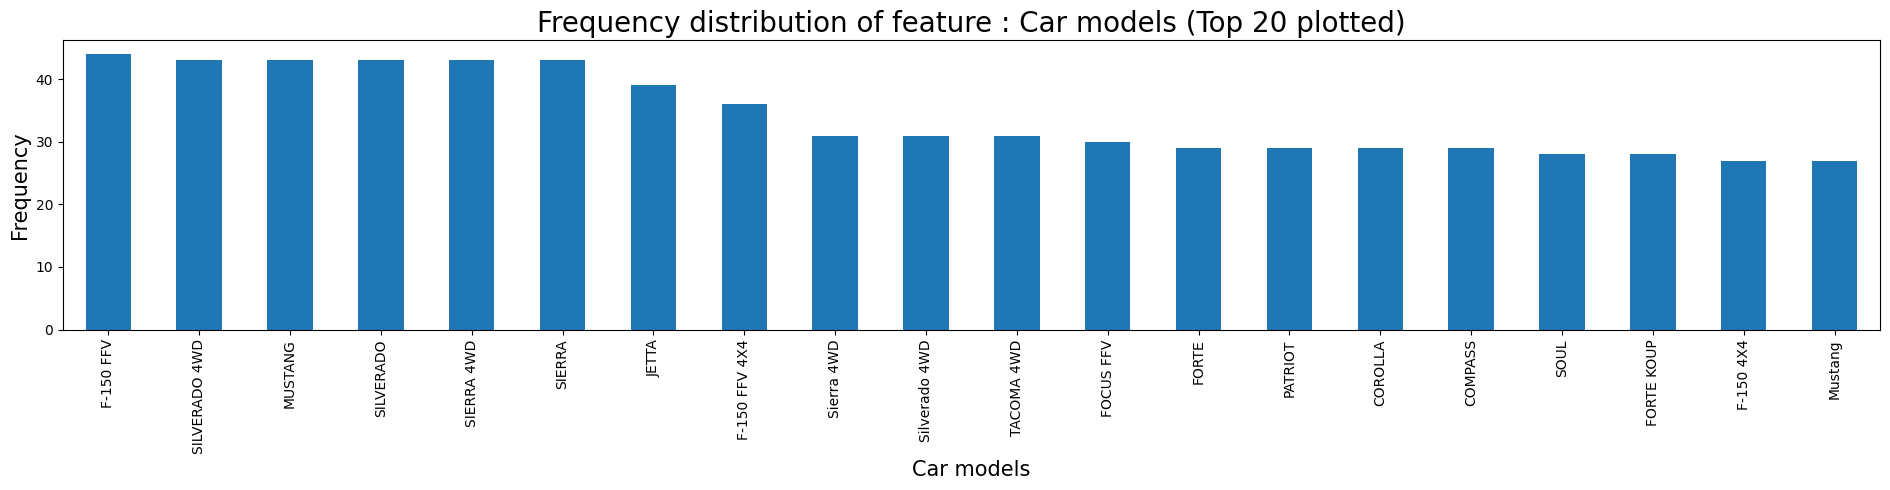

In [ ]:
print(f"Top 20 car models out of total {fuel_con.Model.nunique()} car models")
print(tabulate(pd.DataFrame(fuel_con.Model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(19,5));
fuel_con.groupby("Model")["Model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ***3. Feature : Vehicle Class***

Vehicle Class
------------------------  ----
COMPACT                   1282
MID-SIZE                  1250
SUV: Small                1145
SUV - SMALL                828
Mid-size                   776
SUV: Standard              767
SUV                        760
SUBCOMPACT                 725
FULL-SIZE                  657
Pickup truck: Standard     612
PICKUP TRUCK - STANDARD    572
Compact                    551
TWO-SEATER                 538
SUV - STANDARD             528
Subcompact                 526
Full-size                  465
MINICOMPACT                425
STATION WAGON - SMALL      372
Two-seater                 352
PICKUP TRUCK - SMALL       248
Minicompact                228
Station wagon: Small       154
VAN - PASSENGER            154
Pickup truck: Small        125
MINIVAN                    112
VAN - CARGO                106
Special purpose vehicle     67
SPECIAL PURPOSE VEHICLE     52
Station wagon: Mid-size     52
STATION WAGON - MID-SIZE    50
Minivan                  

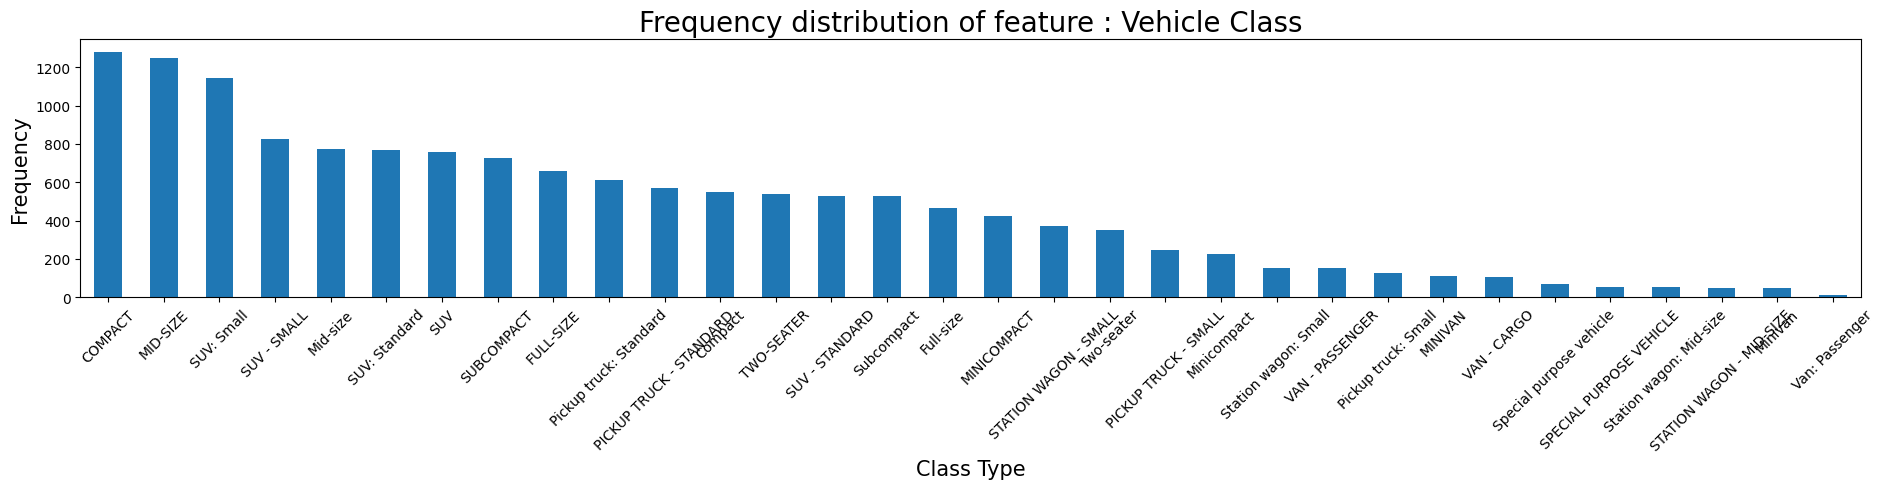

In [ ]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(fuel_con["Vehicle Class"].value_counts())))

plt.figure(figsize=(19,5));
fuel_con.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ***4. Feature : Transmission***

Transmission
---------------------------  ----
Automatic with Select Shift  5689
Automatic                    4228
Manual                       2398
Automated Manual             1109
Continuously Variable        1104
AV1                            12
---------------------------  ----


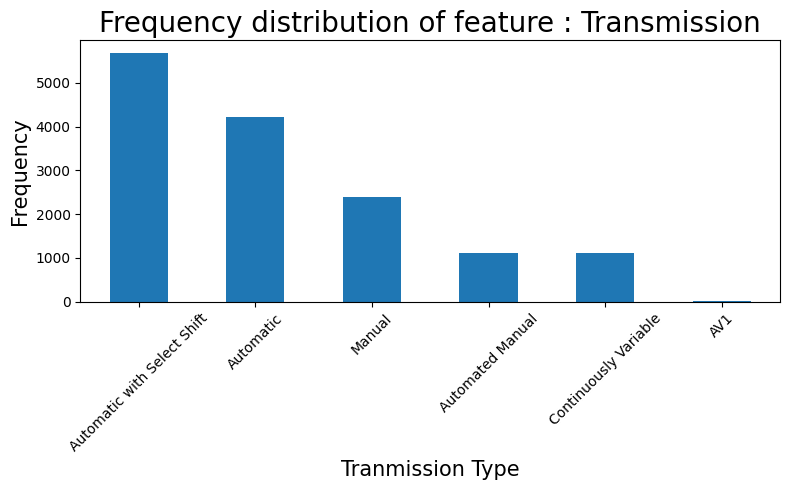

In [ ]:
print("Transmission")
print(tabulate(pd.DataFrame(fuel_con.Transmission.value_counts())))

plt.figure(figsize=(8,5));
fuel_con.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ***5. Feature : Fuel Type***

Fuel Type
----------------  ----
Regular Gasoline  7079
Premium Gasoline  6342
Ethanol(E85)       802
Diesel             316
Natural Gas          1
----------------  ----


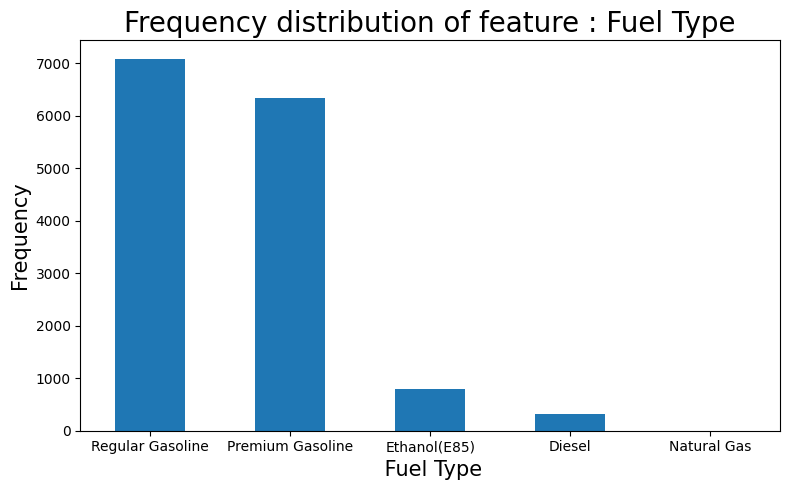

In [ ]:
print("Fuel Type")
print(tabulate(pd.DataFrame(fuel_con["Fuel Type"].value_counts())))

plt.figure(figsize=(8,5));
fuel_con.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **INTERPRETATION**

**1.** Out of the 81 car brands BMW and Chevrolet are the most dominating ones. Whereas cars of Smart, Bugatti and SRT are the ones with lowest frequency.

**2.** SUV-Small and Compact vehicles are the most frequent ones on Canadian roads.

**3.** Frequency of car with Transmission type Automatic with Select Shift is the highest and with Continuously Variable Transmission is the lowest.

**4.** Car which runs on Gasoline let it be Regular or Premium is the most common vehicle type. And cars running on Diesel are very low in frequency and there is only one sample which uses Natural Gases.

## **Variation in CO2 emissions with different features**

#### ***1. Feature : Make***

Text(0, 0.5, 'CO2 Emissions(g/km)')

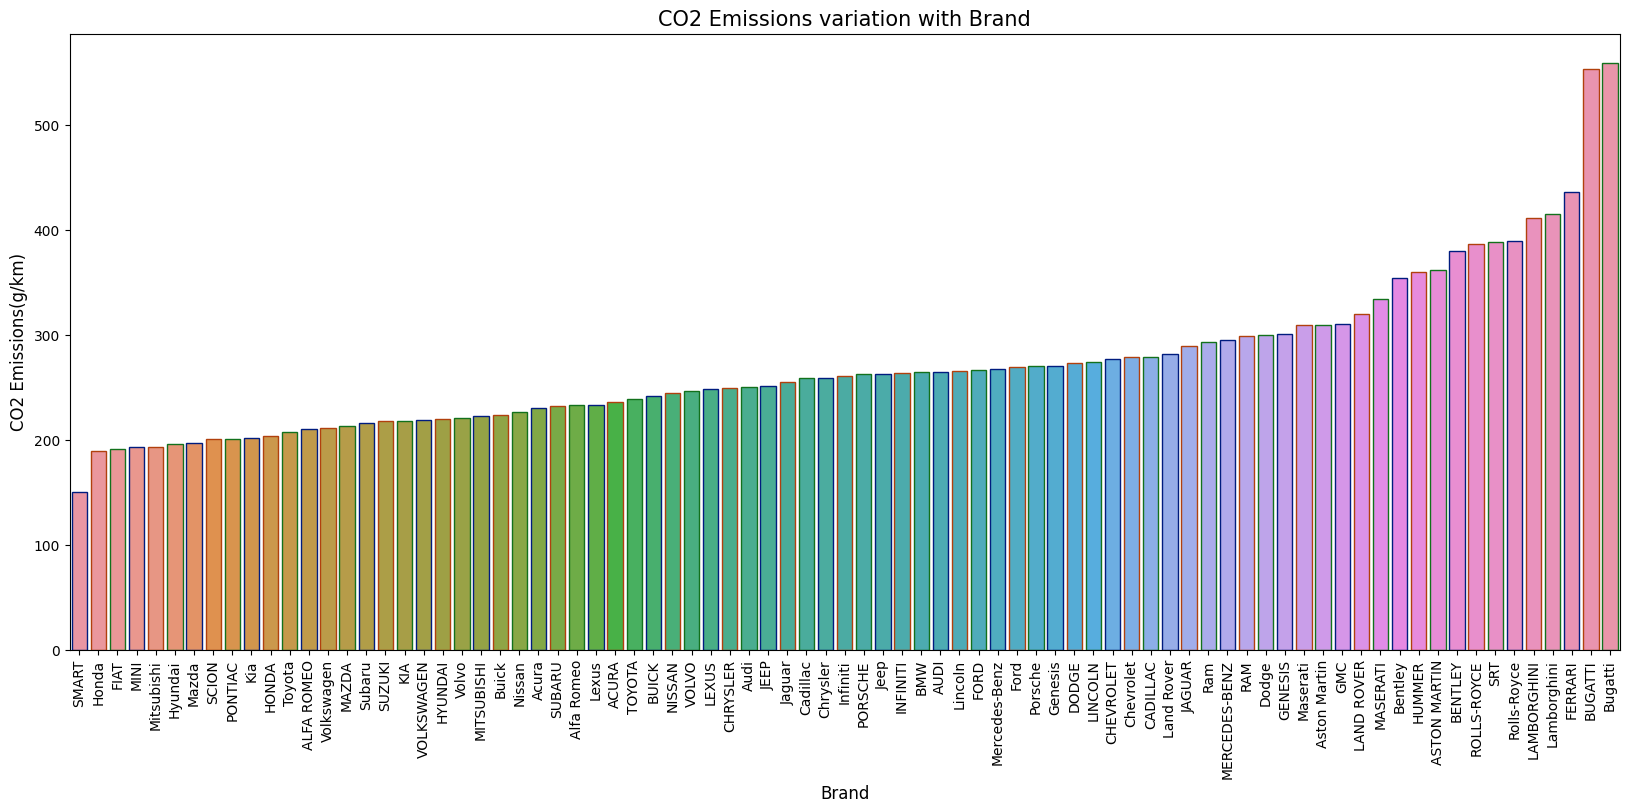

In [ ]:
CO2_make = fuel_con.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

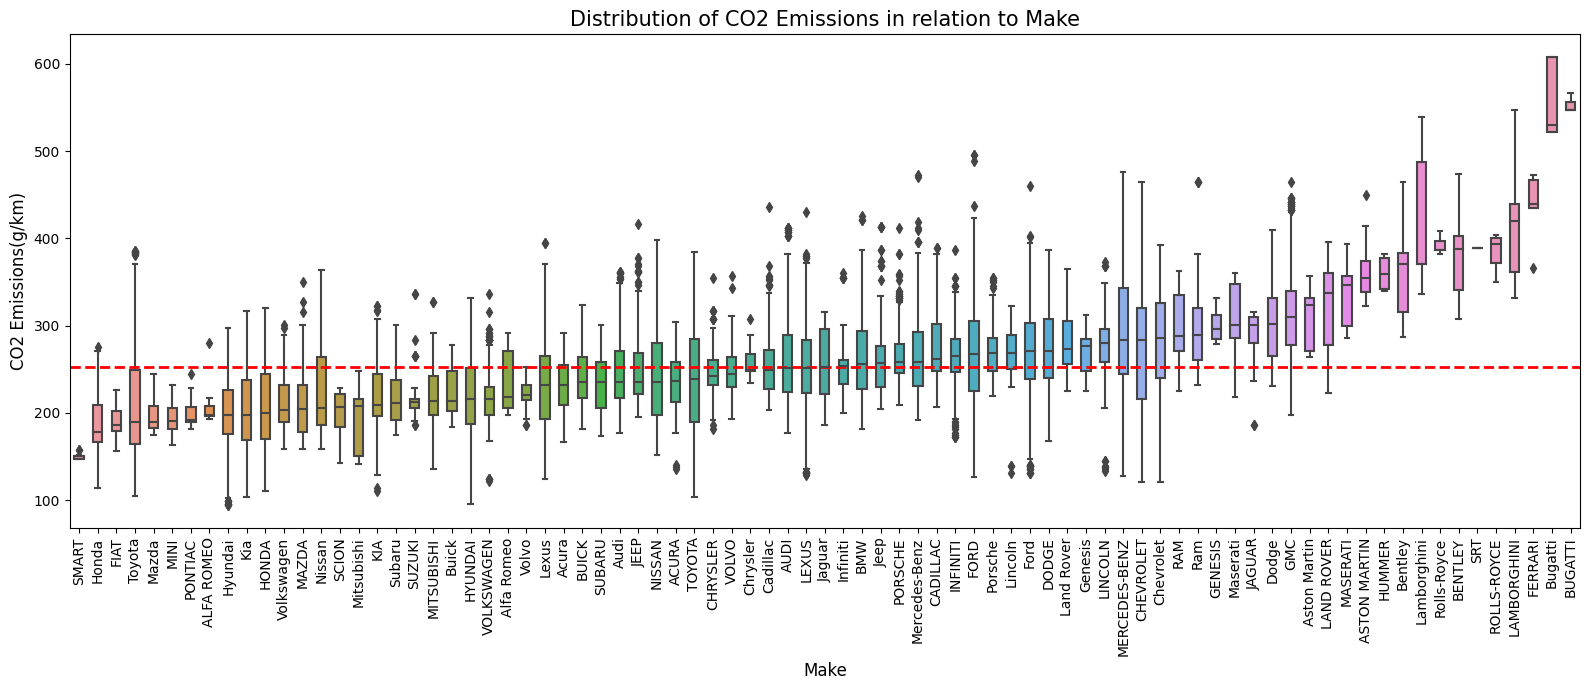

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

# **ANALYSIS**

**1.** From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the brand Bugatti is the highest and cars of SMART has the lowest emissions.

**2.** The red line signify the sample mean of CO2 emissions.

**3.** Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.



#### ***2. Feature : Vehicle Class***

Text(0, 0.5, 'CO2 Emissions(g/km)')

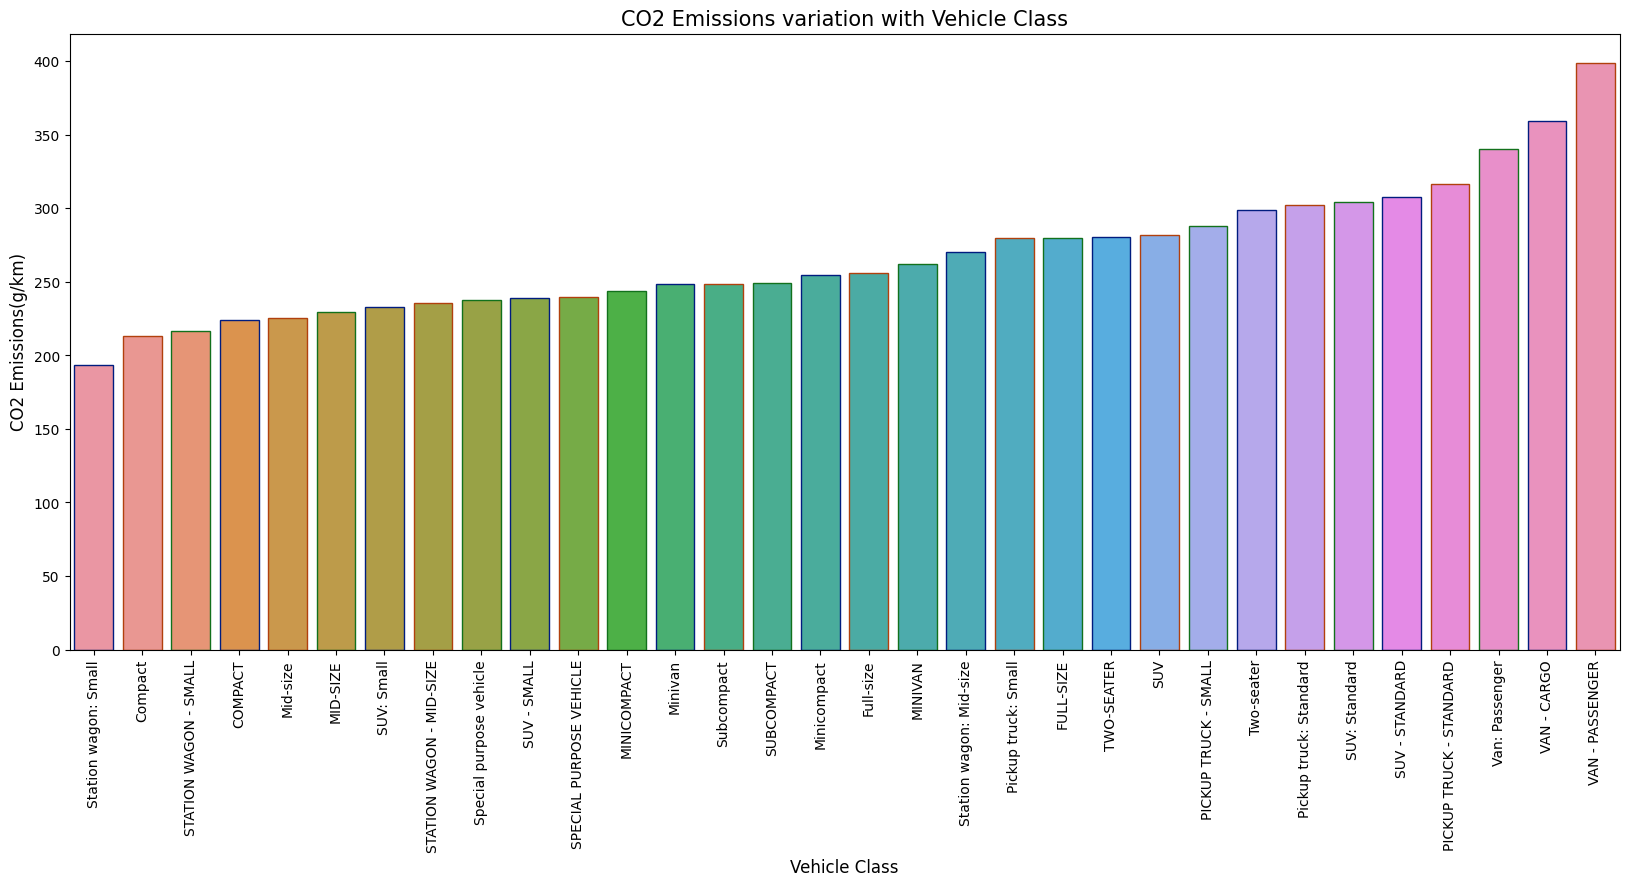

In [ ]:
CO2_class = fuel_con.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Vehicle Class",y="CO2 Emissions(g/km)",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

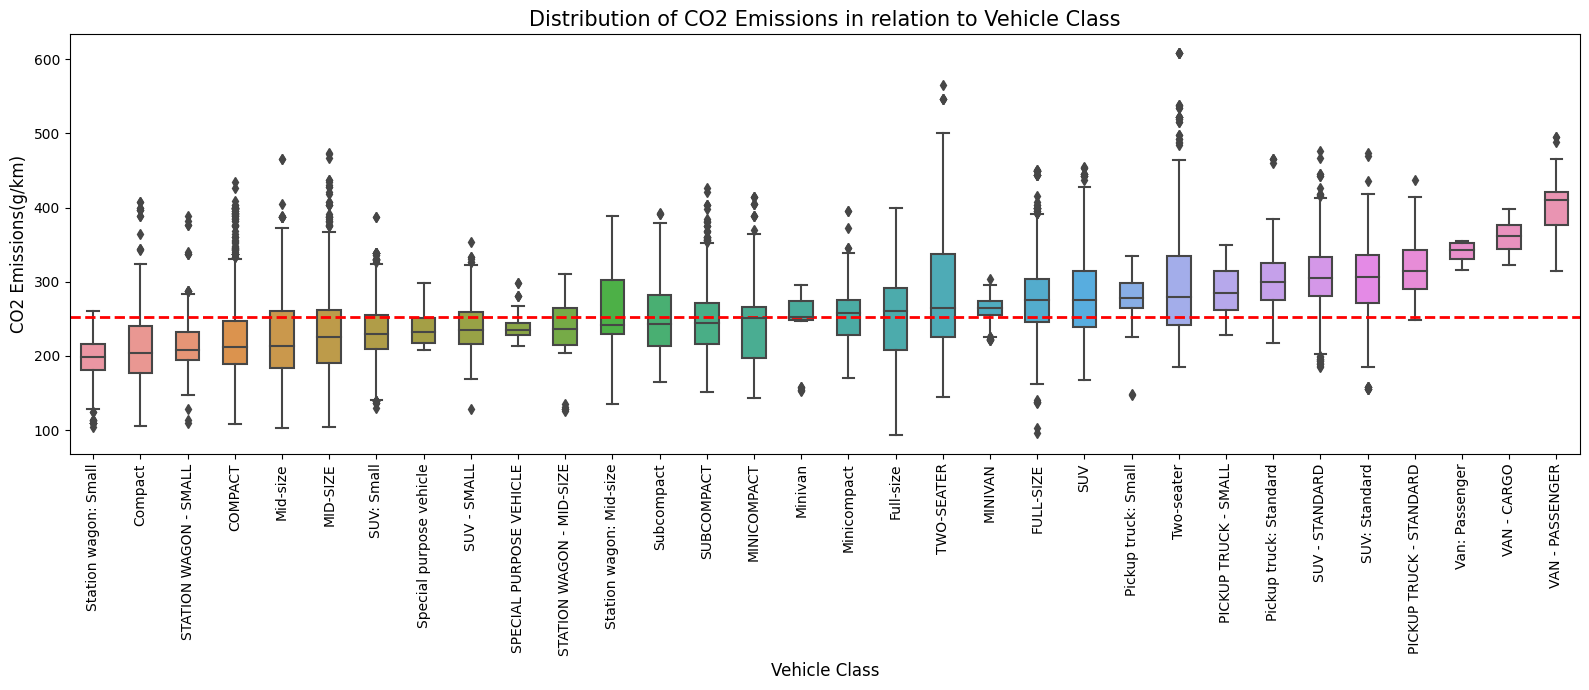

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

# **ANALYSIS**

**1.** The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all. And Station Wagon-Small has the lowest CO2 emissions



#### ***3. Feature : Transmission***

Text(0, 0.5, 'CO2 Emissions(g/km)')

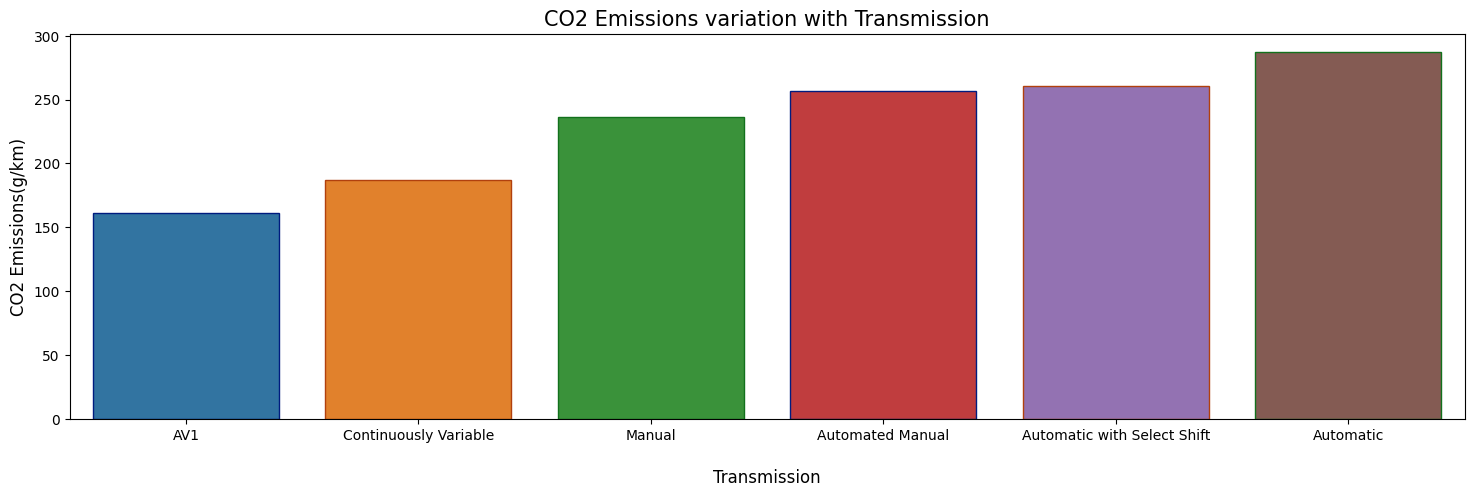

In [ ]:
CO2_transmission = fuel_con.groupby(["Transmission"])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(18,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

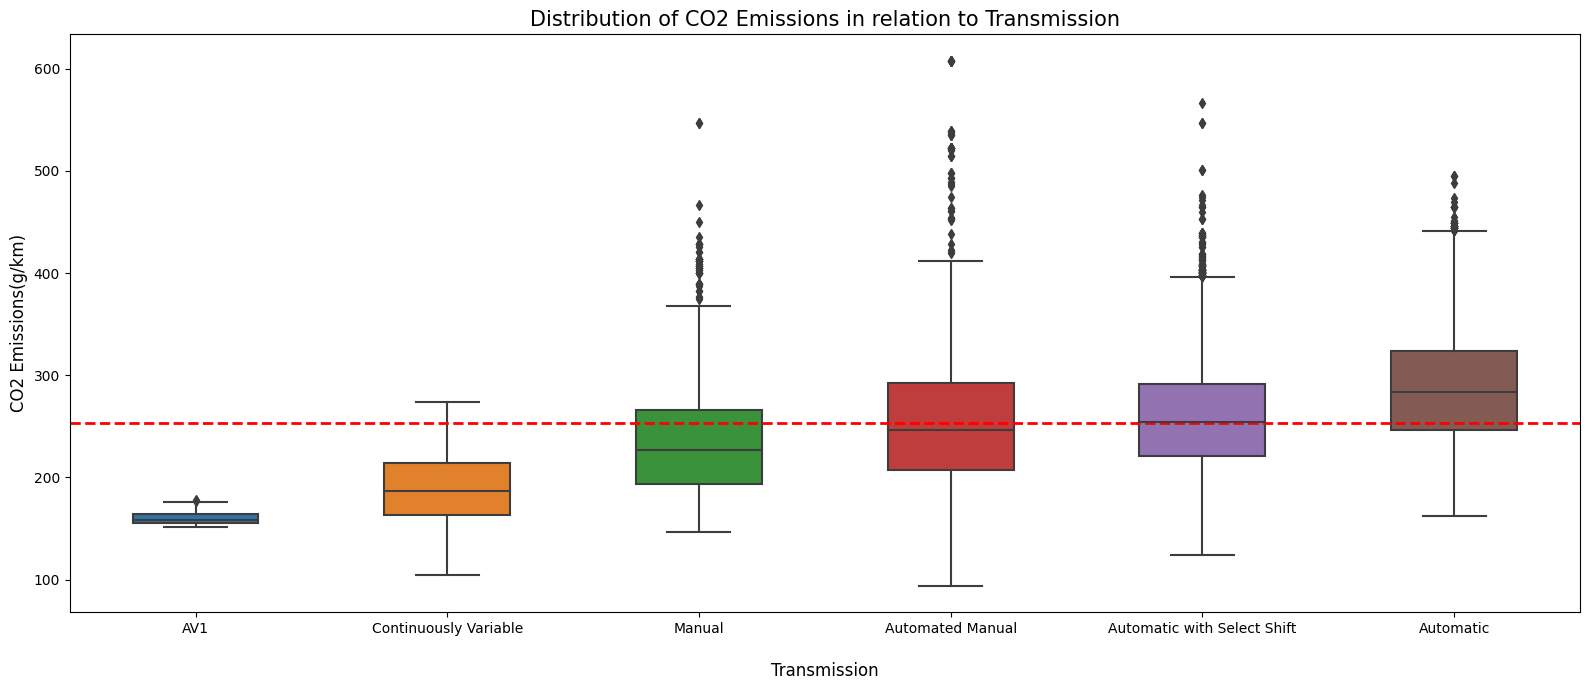

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

## **ANALYSIS**

**1.** Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.

**2.** Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

#### ***4. Feature : Fuel Type***

Text(0, 0.5, 'CO2 Emissions(g/km)')

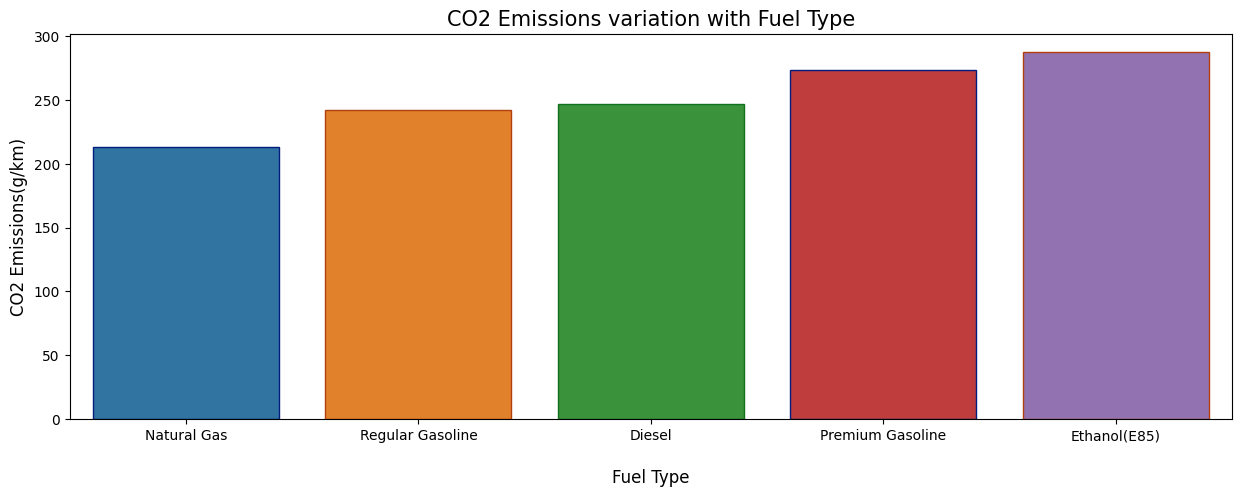

In [ ]:
CO2_fuel_type = fuel_con.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Fuel Type",y="CO2 Emissions(g/km)",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

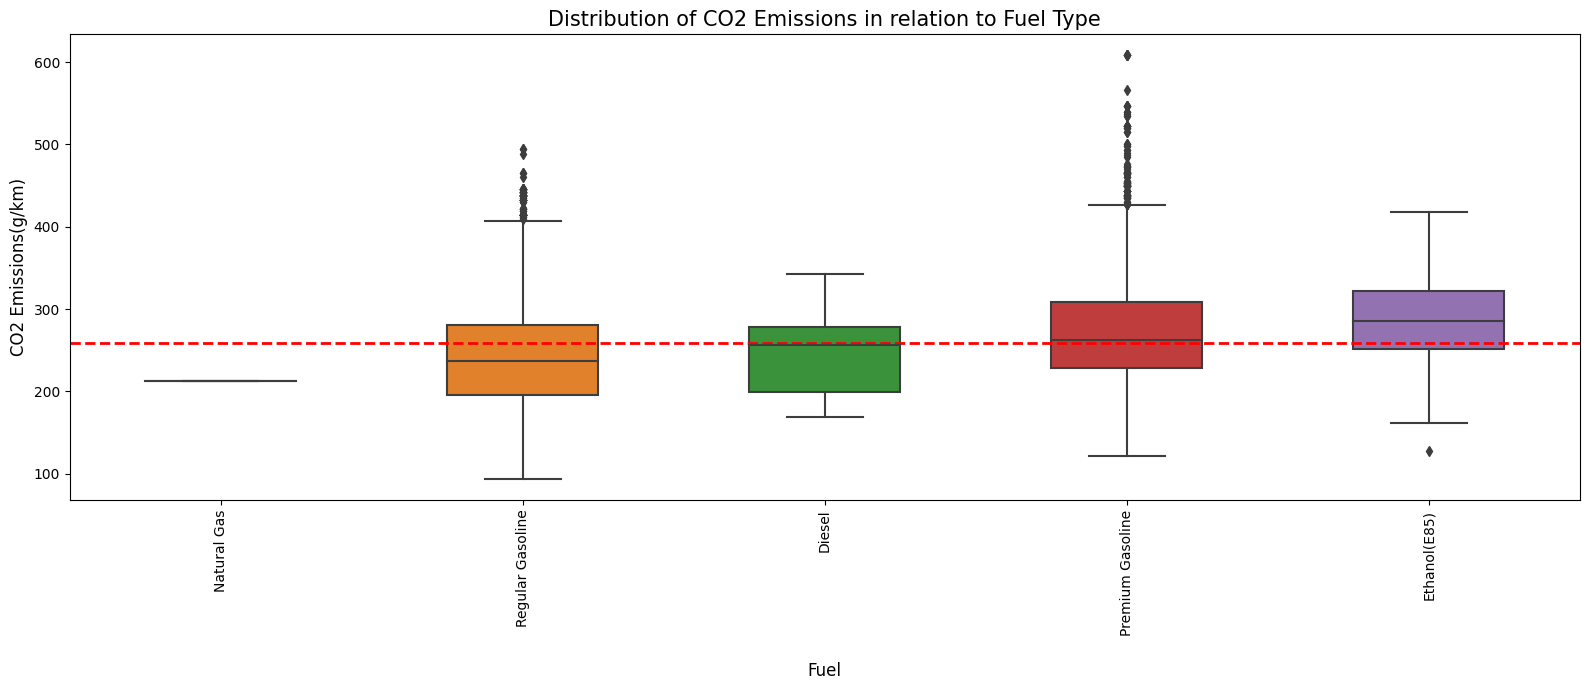

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

## **ANALYSIS**

**1.** Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values higher than the sample median CO2 emissions.

**2.** Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.

**3.** The median CO2 emissions of fuel type Premium Gasoline and Diesel has almost similar median to that of the sample median.

## **Analysing the Numerical Values**

### ***To check the shape of the distribution and skewness of each feature***

### ***To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot***

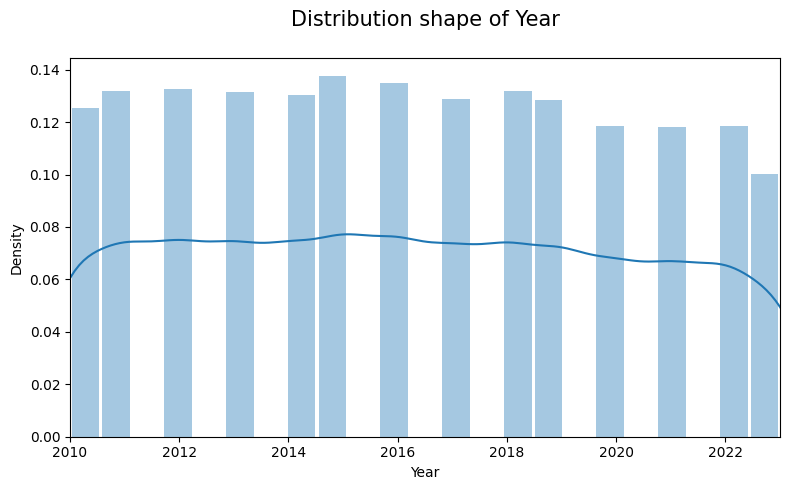

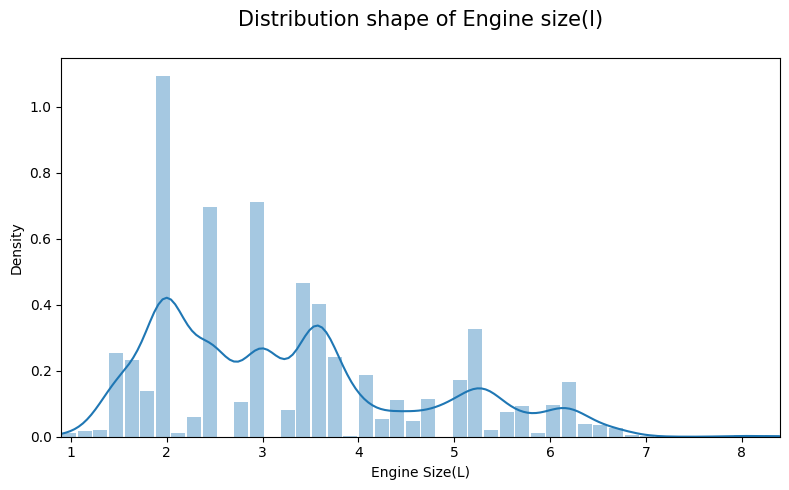

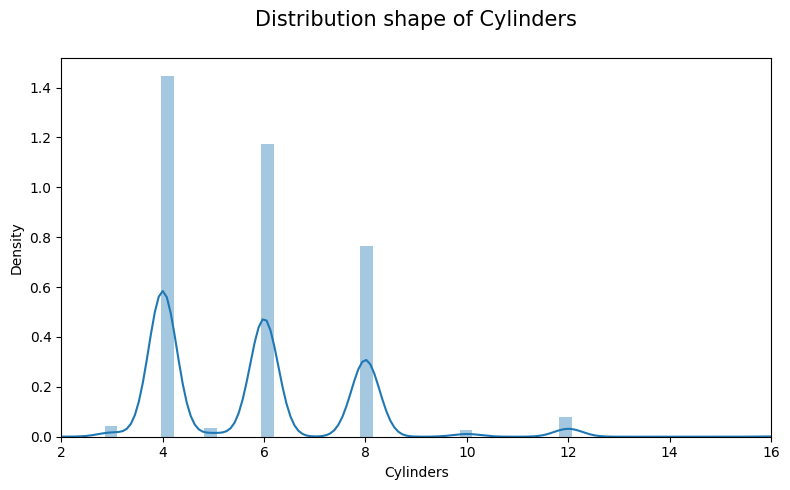

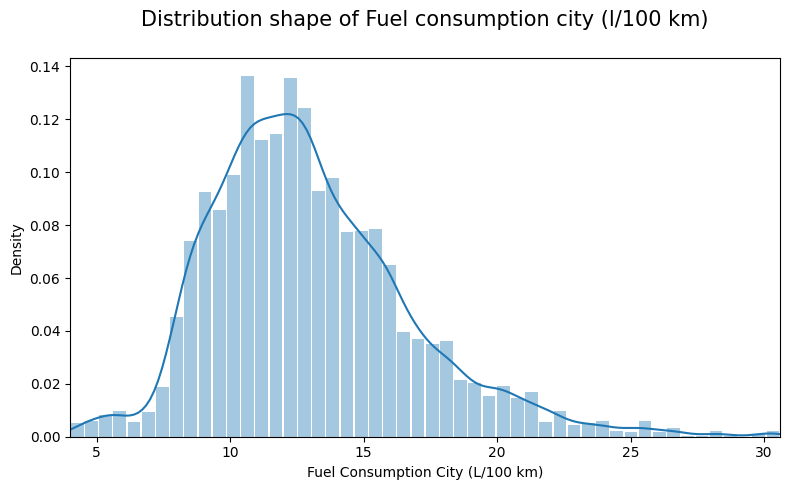

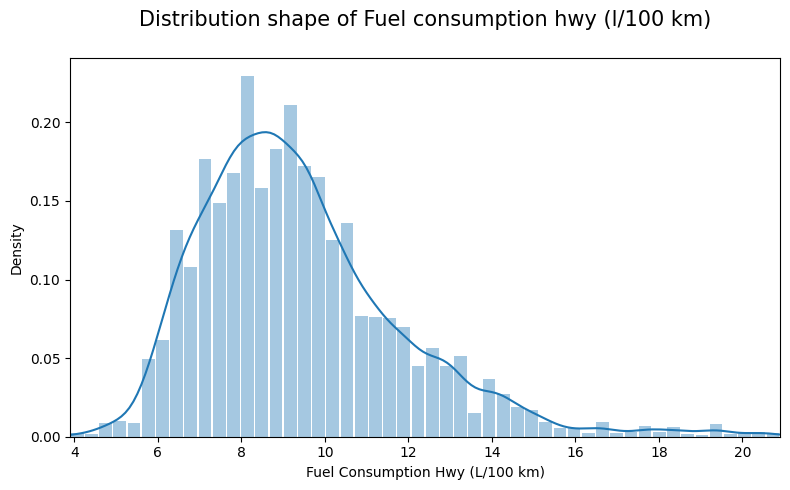

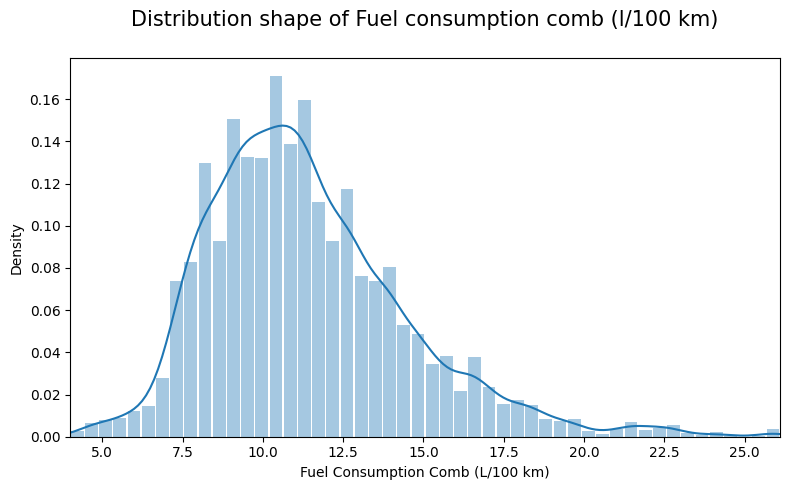

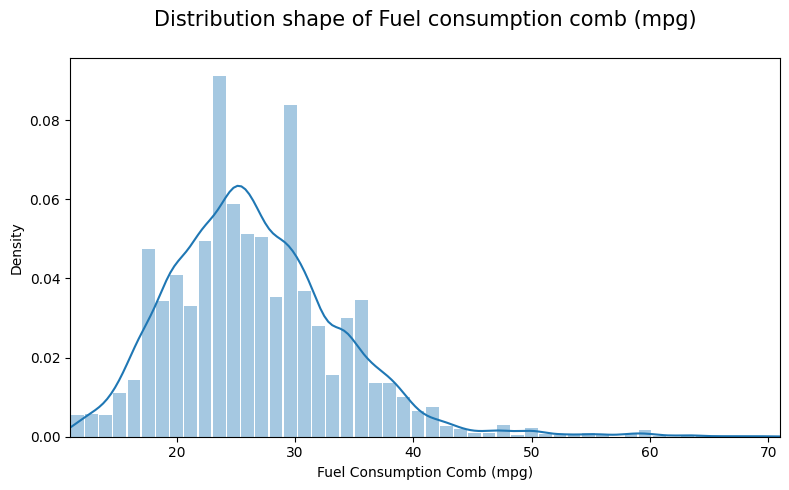

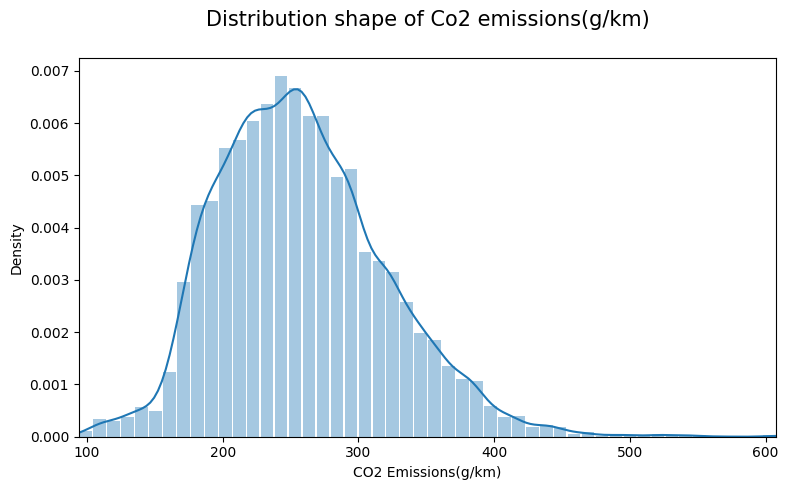

In [ ]:
for feature in fuel_con.select_dtypes("number").columns:

    plt.figure(figsize=(8,5))
    sns.distplot(fuel_con[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(fuel_con[feature].min(), fuel_con[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [ ]:
fuel_con.describe()

,Year,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,14540.000000,14540.000000,14540.000000,14540.000000,14540.000000,14540.000000,14540.000000,14540.000000
mean,2016.292847,3.274030,5.744704,12.994477,9.405117,11.379188,26.645942,258.249450
std,3.940047,1.375401,1.883723,3.767742,2.454666,3.140757,7.264070,62.086726
min,2010.000000,0.900000,2.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2013.000000,2.000000,4.000000,10.400000,7.700000,9.200000,22.000000,214.000000
50%,2016.000000,3.000000,6.000000,12.500000,9.000000,10.900000,26.000000,253.000000
75%,2020.000000,4.000000,6.000000,15.000000,10.600000,13.000000,31.000000,295.000000
max,2023.000000,8.400000,16.000000,30.600000,20.900000,26.100000,71.000000,608.000000


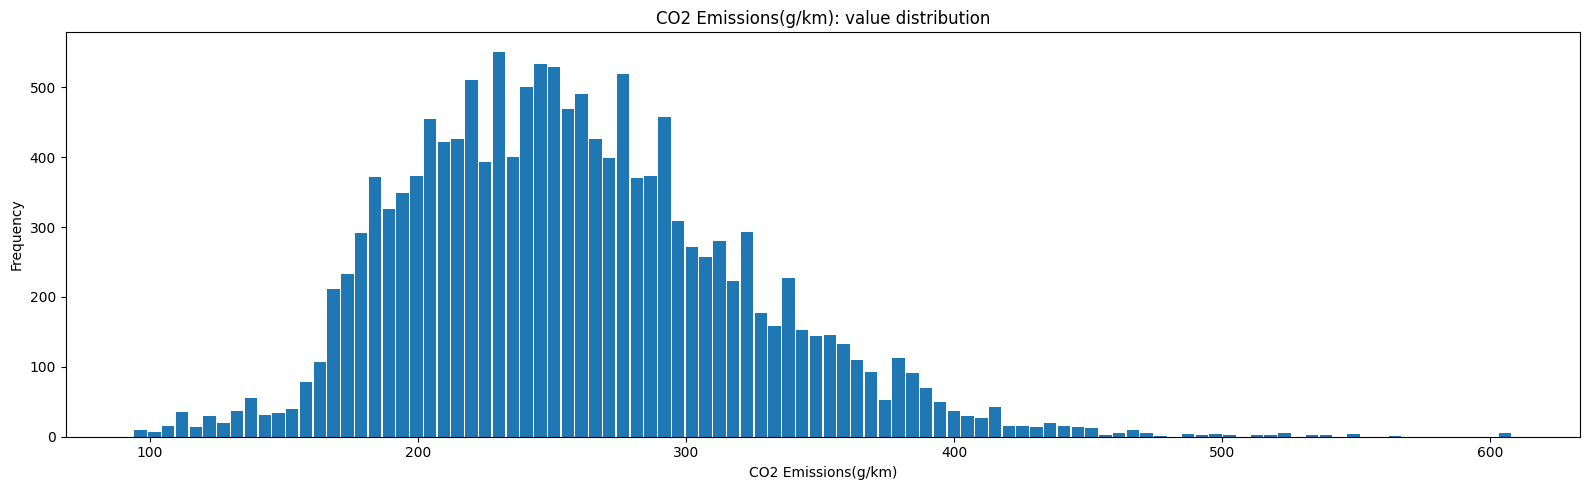

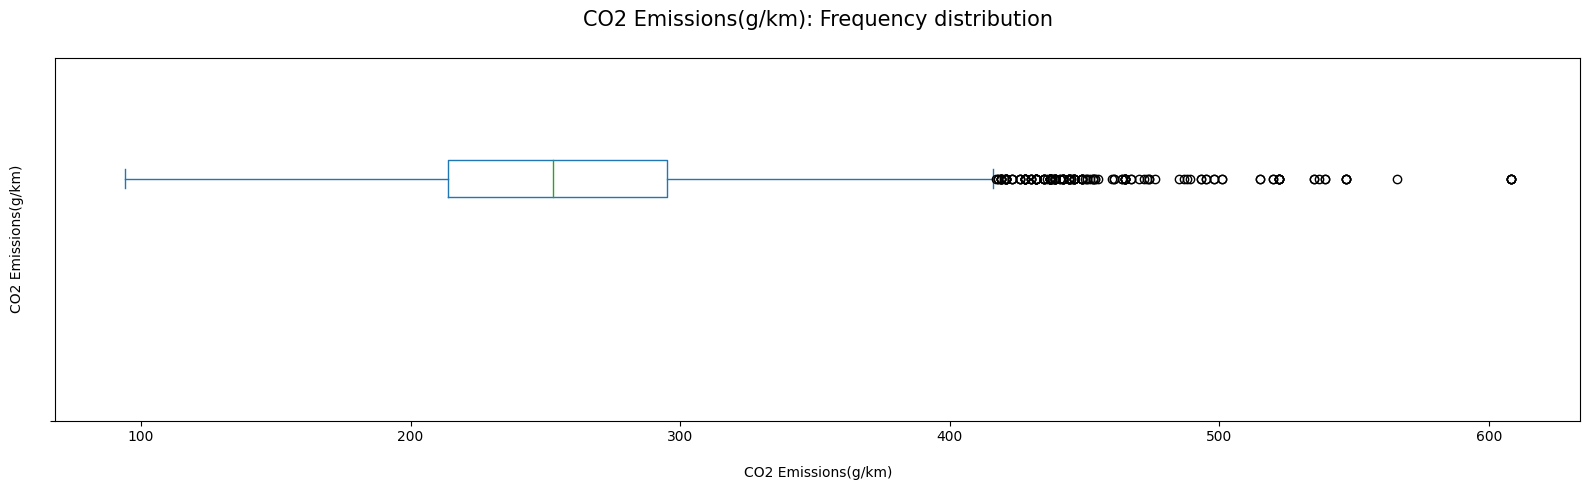

In [ ]:


plt.figure(figsize=(16,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

***ANALYSIS***

From the Box plot we can infer

**1.** The minimum vale of the CO2 emission is around 94.

**2.** The median CO2 emission is 256.

**3.** The 25% of the samples have CO2 emission between 94 and 214.

**4.** The 75% of the samples have CO2 emission between 94 and 295.

**5.** There are no outliers in the lower half but there are outliers in the upper half.

**6.** The maximum CO2 emissions observed is 608 which is an outlier.

**7.** The distribution of CO2 emissions is positively skewed.

## **CORRELATION MATRIX**

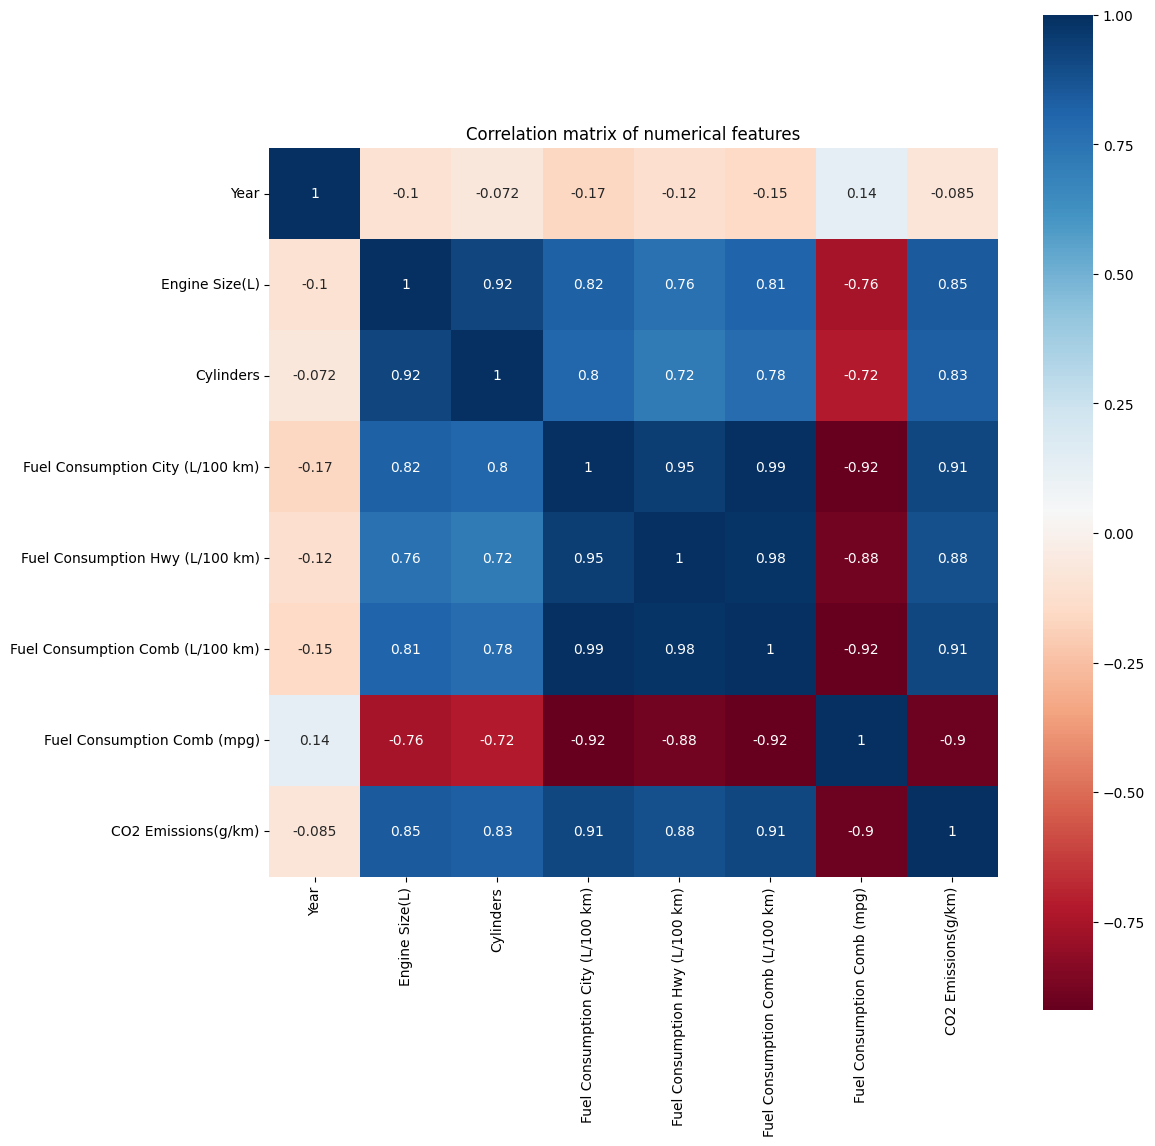

In [ ]:
corr = fuel_con.corr()
plt.subplots(figsize=(12,12));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

# **ANALYSIS**

**1.** Fuel Consumption Comb (mpg) is negatively correlated to all the features.

**2.** All the other features are positively correlated with each other.

**3.** Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.

**4.** Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).

### ***Correlation of independent features with dependent variable***

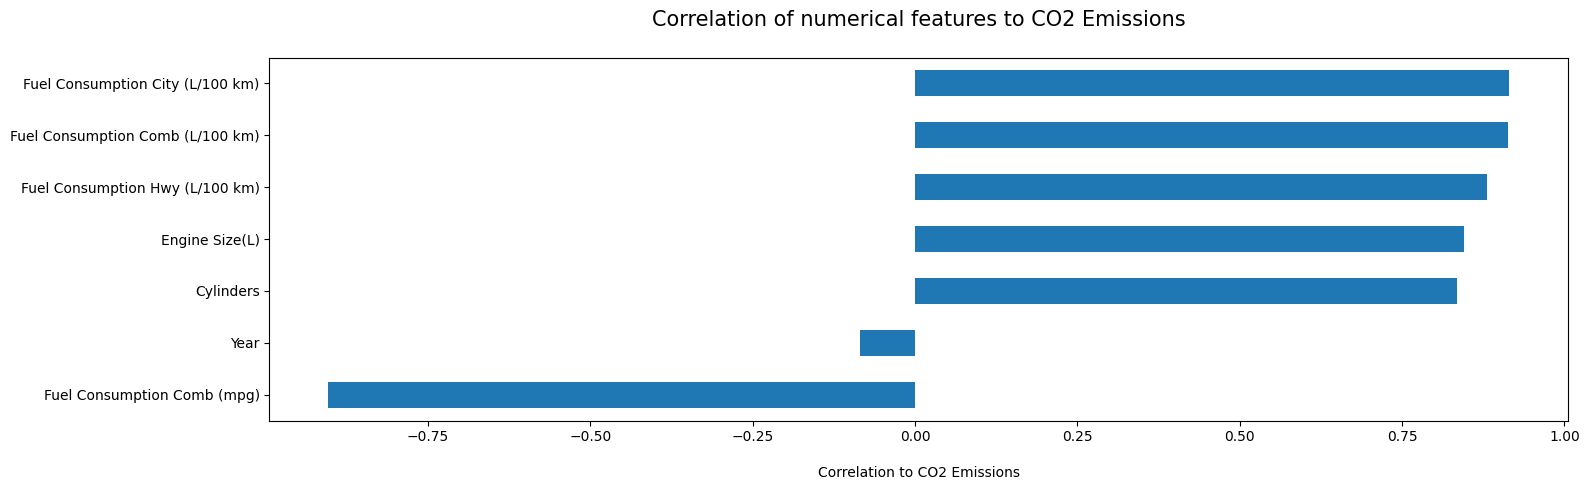

In [ ]:
plt.figure(figsize=(16,5))
corr["CO2 Emissions(g/km)"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

## **Variation in CO2 emissions with different features**

#### ***1. Feature : Cylinders***

Text(0, 0.5, 'CO2 Emissions(g/km)')

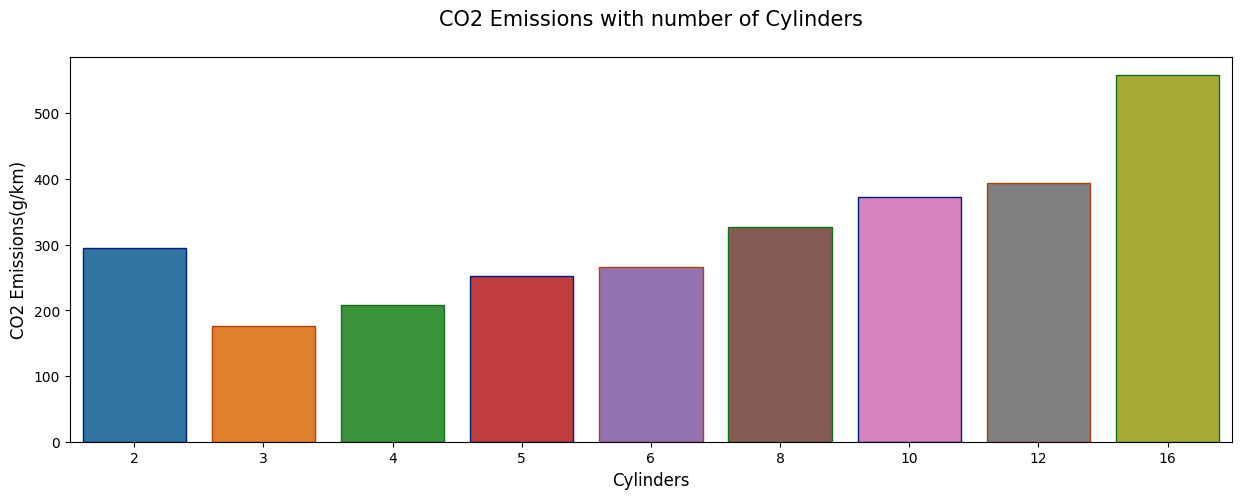

In [ ]:
CO2_cylinder = fuel_con.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

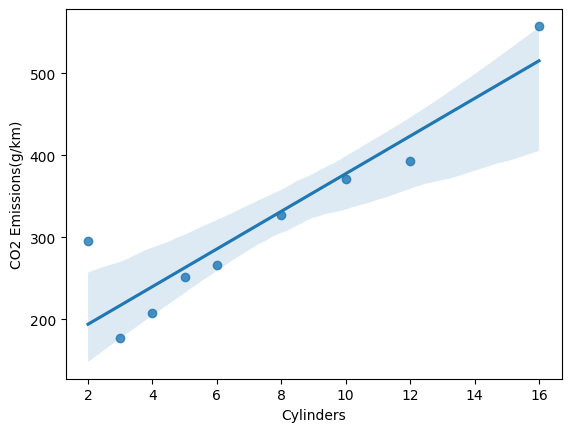

In [ ]:
sns.regplot(x="Cylinders", y="CO2 Emissions(g/km)", data=CO2_cylinder)

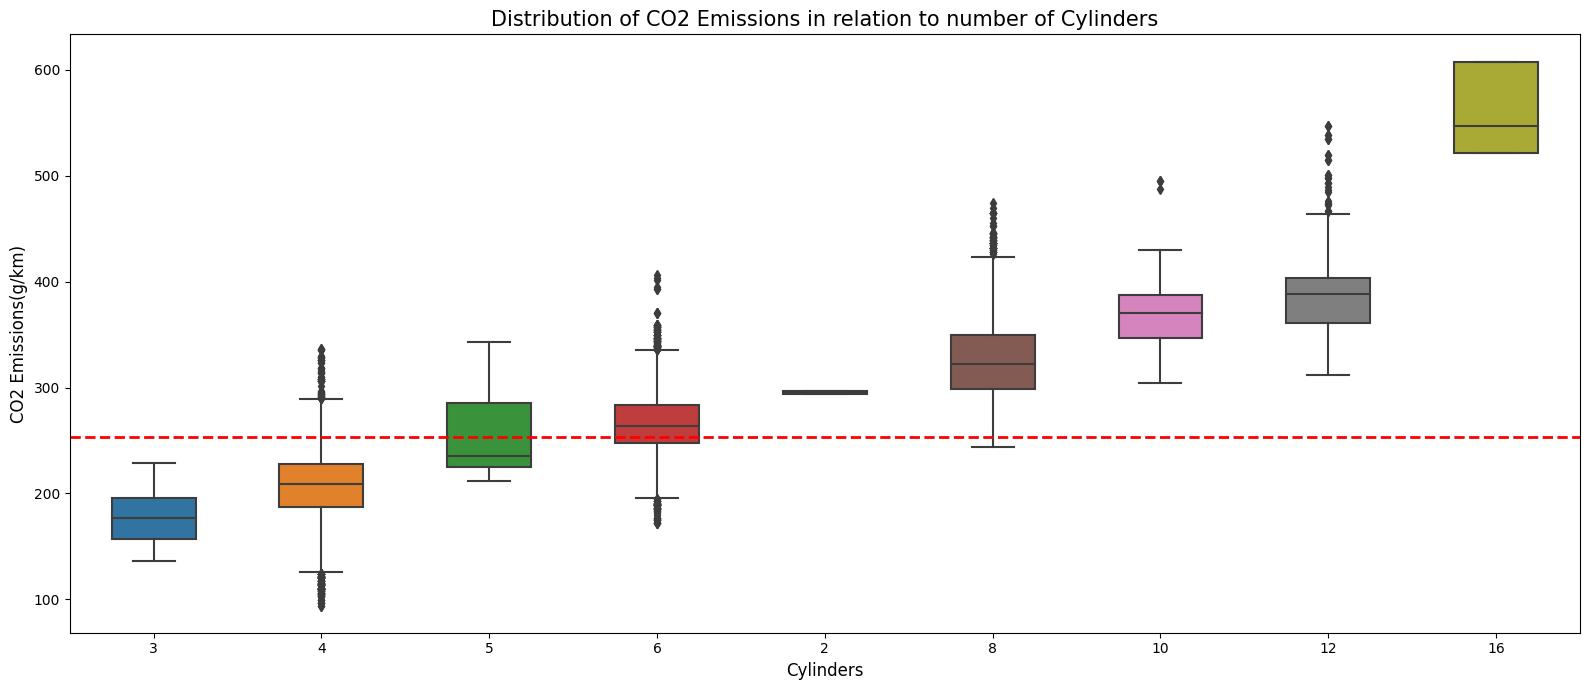

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

***ANALYSIS***

**1.** With increase in number of Cylinders, CO2 emissions also increase proportionally.

**2.** The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly poistively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.

**3.** Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.

**4.** Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.

**5.** Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.

#### ***2. Feature : Engine Size(L)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

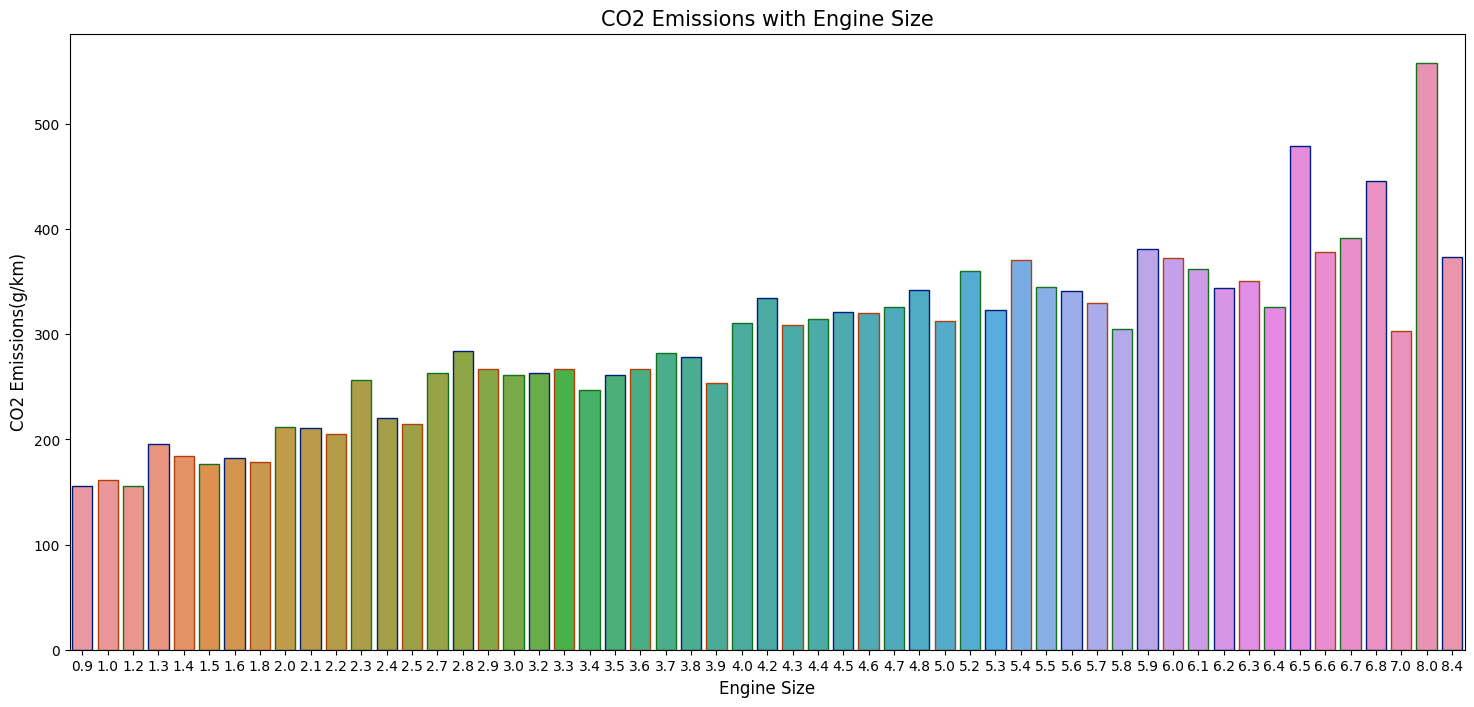

In [ ]:
CO2_engine = fuel_con.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

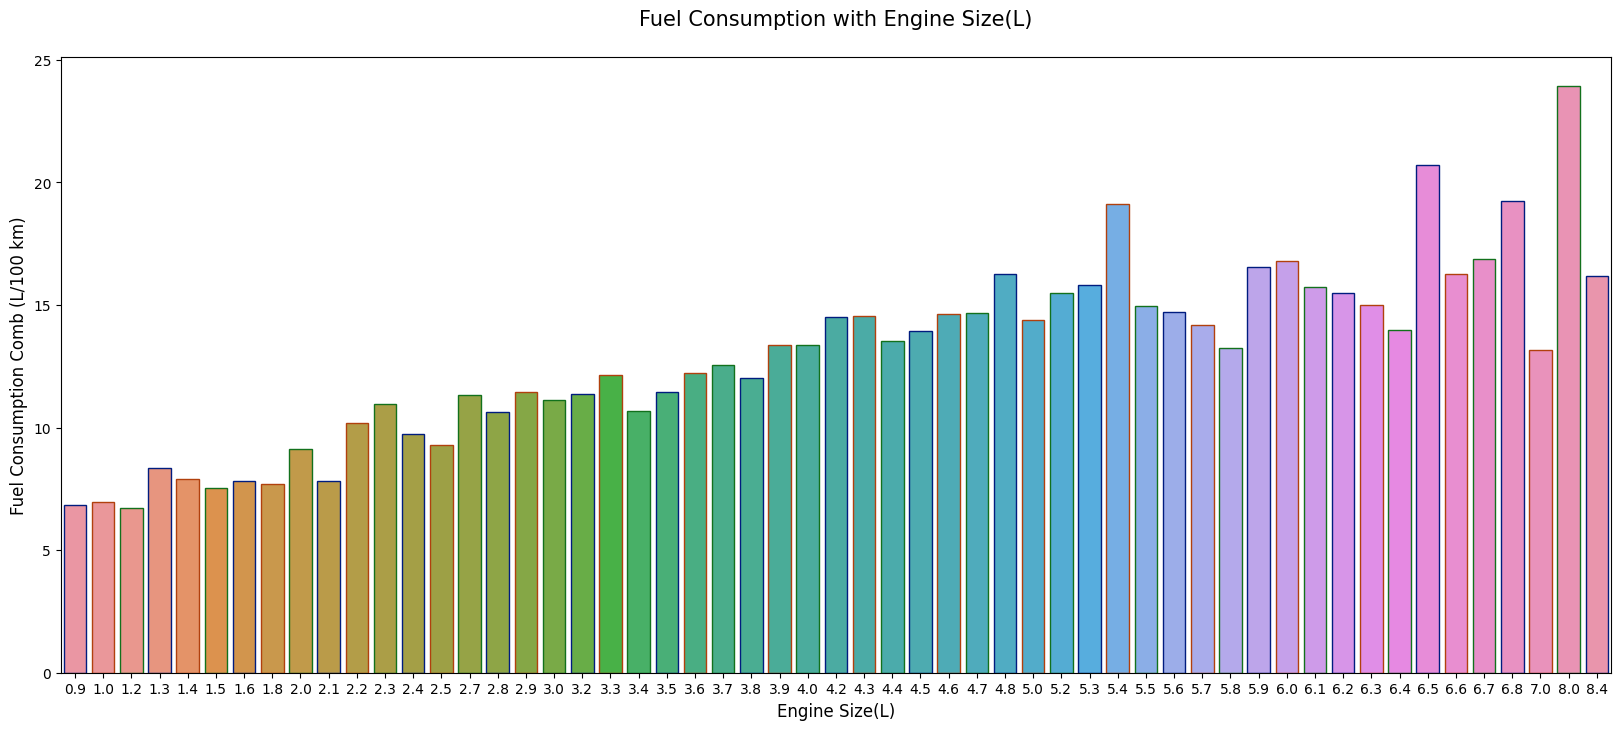

In [ ]:
fuel_engine = fuel_con.groupby(['Engine Size(L)'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Engine Size(L)",y="Fuel Consumption Comb (L/100 km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

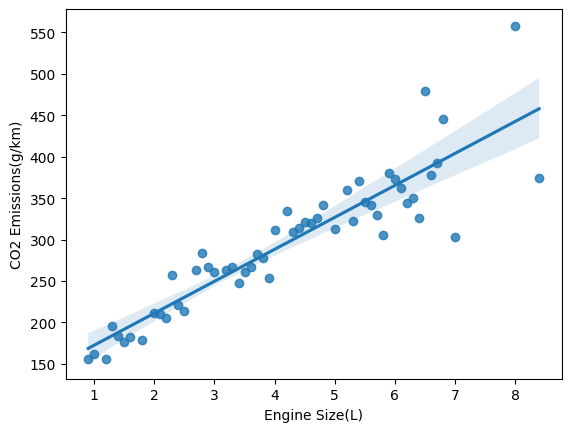

In [ ]:
sns.regplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=CO2_engine)

# **ANALYSIS**

**1.** With increase in Engine Size, CO2 emissions also increases.

**2.** The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly positively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.

**3.** Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.

# **DATA PREPROCESSING**

## ***Conversion of Categorical Values to Binary Vectors by creating Dummy Variables***

In [ ]:
emission = pd.get_dummies(data = fuel_con, columns=['Transmission', 'Fuel Type'])

In [ ]:
emission.head()

,Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),...,Transmission_Automated Manual,Transmission_Automatic,Transmission_Automatic with Select Shift,Transmission_Continuously Variable,Transmission_Manual,Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline
0,2010,ACURA,CSX,COMPACT,2.0,4,10.9,7.8,9.5,30,...,0,0,1,0,0,0,0,0,0,1
1,2010,ACURA,CSX,COMPACT,2.0,4,10.0,7.6,8.9,32,...,0,0,0,0,1,0,0,0,0,1
2,2010,ACURA,CSX,COMPACT,2.0,4,11.6,8.1,10.0,28,...,0,0,0,0,1,0,0,0,1,0
3,2010,ACURA,MDX AWD,SUV,3.7,6,14.8,11.3,13.2,21,...,0,0,1,0,0,0,0,0,1,0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,13.2,10.3,11.9,24,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
emission = emission.drop(columns=['Make', 'Model', 'Vehicle Class', 'Transmission_Automatic with Select Shift', 'Fuel Type_Natural Gas'],axis=1)

In [ ]:
emission.head()

,Year,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_AV1,Transmission_Automated Manual,Transmission_Automatic,Transmission_Continuously Variable,Transmission_Manual,Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline
0,2010,2.0,4,10.9,7.8,9.5,30,219,0,0,0,0,0,0,0,0,1
1,2010,2.0,4,10.0,7.6,8.9,32,205,0,0,0,0,1,0,0,0,1
2,2010,2.0,4,11.6,8.1,10.0,28,230,0,0,0,0,1,0,0,1,0
3,2010,3.7,6,14.8,11.3,13.2,21,304,0,0,0,0,0,0,0,1,0
4,2010,2.3,4,13.2,10.3,11.9,24,274,0,0,0,0,0,0,0,1,0


In [ ]:
emission.columns

Index(['Year', 'Engine Size(L)', 'Cylinders',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)', 'Transmission_AV1',
       'Transmission_Automated Manual', 'Transmission_Automatic',
       'Transmission_Continuously Variable', 'Transmission_Manual',
       'Fuel Type_Diesel', 'Fuel Type_Ethanol(E85)',
       'Fuel Type_Premium Gasoline', 'Fuel Type_Regular Gasoline'],
      dtype='object')

In [ ]:
names = ['Engine Size(L)', 'Cylinders', 'Transmission_Automated Manual', 'Transmission_Automatic',
             'Transmission_Continuously Variable', 'Transmission_Manual', 'Fuel Type_Diesel', 'Fuel Type_Ethanol(E85)',
             'Fuel Type_Premium Gasoline', 'Fuel Type_Regular Gasoline', 'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

In [ ]:
emission = emission[names]

## **Correlation matrix after encoding the features**

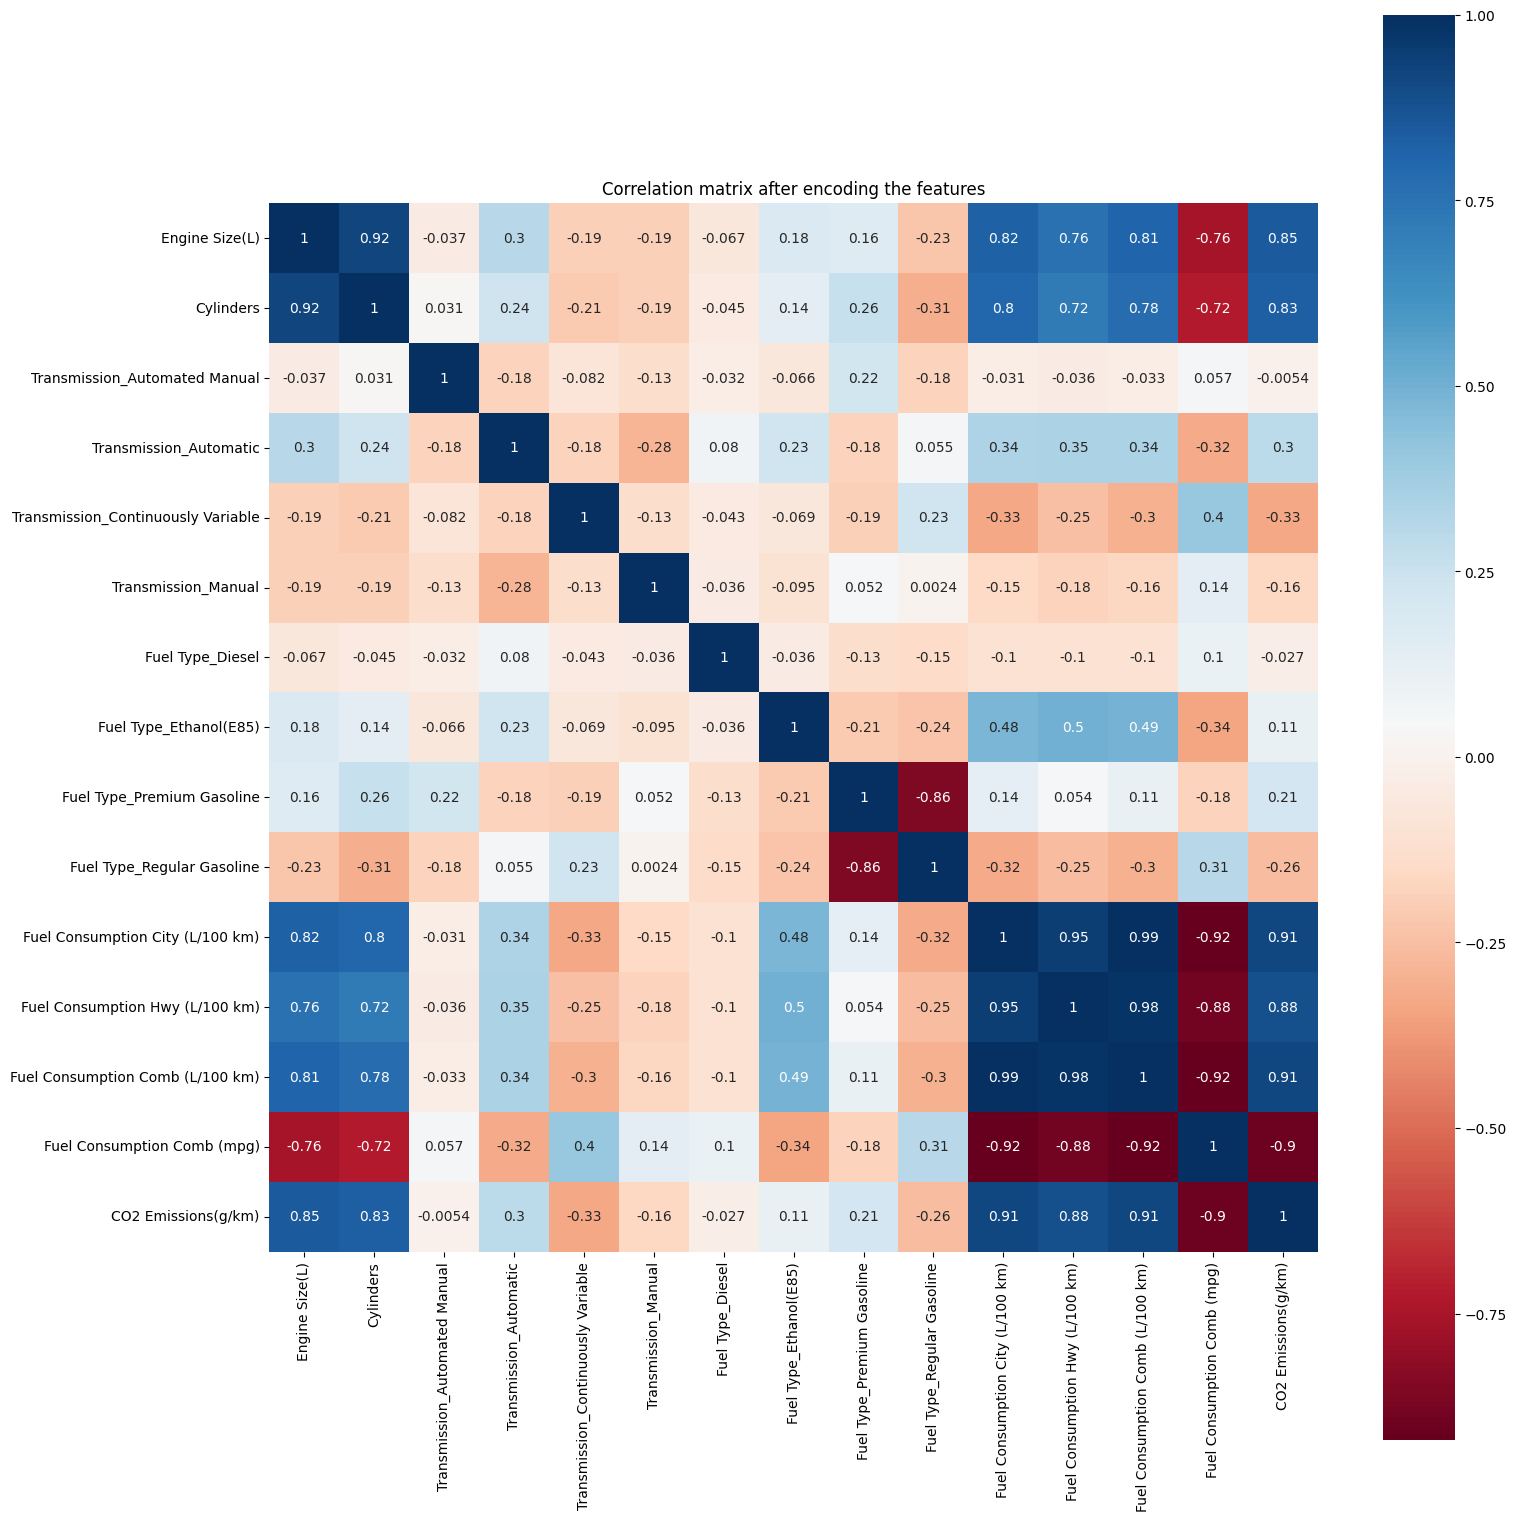

In [ ]:
corr = emission.corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix after encoding the features")
plt.tight_layout()

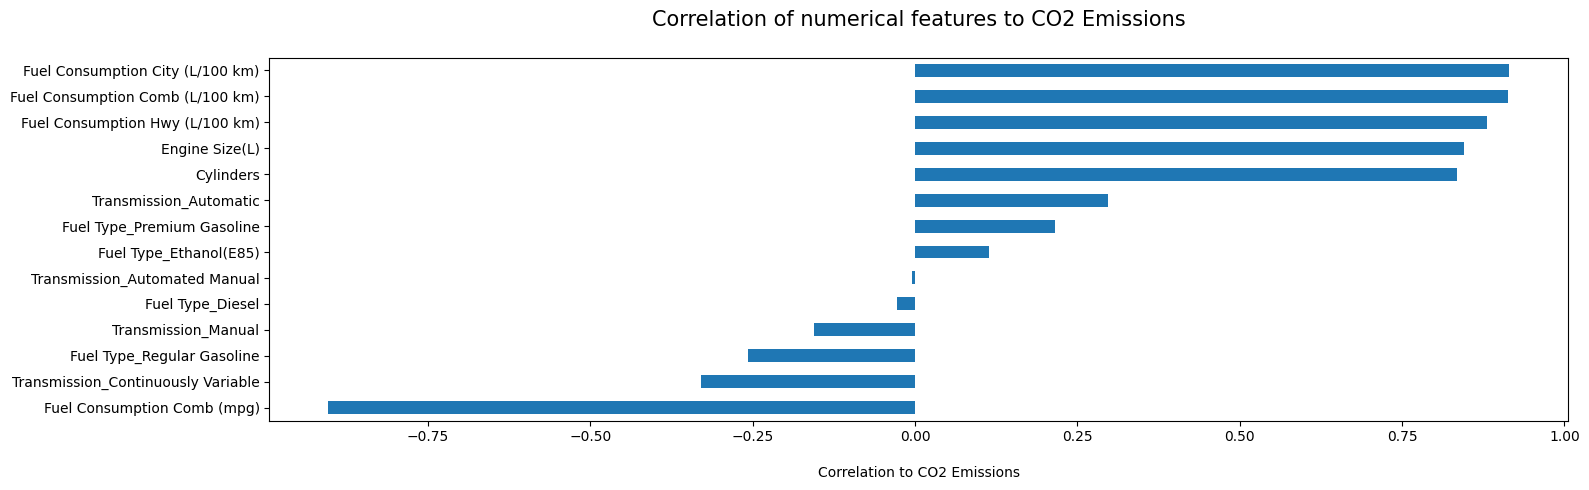

In [ ]:
plt.figure(figsize=(16,5))
corr["CO2 Emissions(g/km)"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

# **ANALYSIS**

**1.** It can be observed from the above matrix that there is a strong correlation between Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) to CO2 Emissions.

**2.** The attributes that are not correlated to the dependent variable are not considered in the further analysis and model buildings.

**3.** The attribute Fuel Consumption Comb (mpg) is also not considered for further analysis as it is same as the attribute Fuel Consumption Comb (L/100 km), only the unit is different.

**4.** ***So initially a multiple regression model can be designed with the attributes. i.e Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) leaving out the interaction effect of the two type of fuel consumption. The predictor formula would be Engine Size(L)+Cylinders+Fuel Consumption City (L/100 km)+Fuel Consumption Hwy (L/100 km).***

# **MODEL BUILDING**

In [ ]:
emission.columns

Index(['Engine Size(L)', 'Cylinders', 'Transmission_Automated Manual',
       'Transmission_Automatic', 'Transmission_Continuously Variable',
       'Transmission_Manual', 'Fuel Type_Diesel', 'Fuel Type_Ethanol(E85)',
       'Fuel Type_Premium Gasoline', 'Fuel Type_Regular Gasoline',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
y = emission.iloc[:,-1]

# **1. OLS MODEL**

### ***1.1 Multiple Regression with all the independent variables except the Combined Fuel Consumption***

In [ ]:
X_1 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Transmission_Automated Manual', 'Transmission_Automatic', 'Transmission_Continuously Variable',
                      'Transmission_Manual', 'Fuel Type_Diesel', 'Fuel Type_Ethanol(E85)', 'Fuel Type_Premium Gasoline',
                      'Fuel Type_Regular Gasoline', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_1_ols = sm.add_constant(X_1)
regressor_OLS_1 = sm.OLS(y, X_1_ols).fit()
print(regressor_OLS_1.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.990
Model:                             OLS   Adj. R-squared:                  0.990
Method:                  Least Squares   F-statistic:                 1.245e+05
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:30   Log-Likelihood:                -46905.
No. Observations:                14540   AIC:                         9.384e+04
Df Residuals:                    14527   BIC:                         9.393e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_1_ols.values, i) for i in range(X_1_ols.shape[1])]
vif["features"] = X_1_ols.columns
vif

,VIF Factor,features
0,14575.817088,const
1,8.551044,Engine Size(L)
2,8.206849,Cylinders
3,1.152771,Transmission_Automated Manual
4,1.397906,Transmission_Automatic
5,1.362801,Transmission_Continuously Variable
6,1.229804,Transmission_Manual
7,310.361306,Fuel Type_Diesel
8,759.417078,Fuel Type_Ethanol(E85)
9,3577.767039,Fuel Type_Premium Gasoline


***ANALYSIS***

**1.** On adding all the attributes except the combined fuel consumption, high multicollinearity can be observed.

**2.** Due to high multicollinearity the model is performing abruptly. Both R2 and Adjusted-R2 shoot upto 0.990. Even warning for the same is shown in the OLS output.


**3.** Next we can observe the effect of the interaction variable by taking it in the model.

## ***1.2. Multiple Regression considering the Transmission and Fuel Type variable with combined fuel consumption***

In [ ]:
X_2 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Transmission_Automated Manual', 'Transmission_Automatic', 'Transmission_Continuously Variable',
                      'Transmission_Manual', 'Fuel Type_Diesel', 'Fuel Type_Ethanol(E85)', 'Fuel Type_Premium Gasoline',
                      'Fuel Type_Regular Gasoline', 'Fuel Consumption Comb (L/100 km)']]

In [ ]:
X_2_ols = sm.add_constant(X_2)
regressor_OLS_2 = sm.OLS(y, X_2_ols).fit()
print(regressor_OLS_2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.990
Model:                             OLS   Adj. R-squared:                  0.990
Method:                  Least Squares   F-statistic:                 1.363e+05
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:30   Log-Likelihood:                -46883.
No. Observations:                14540   AIC:                         9.379e+04
Df Residuals:                    14528   BIC:                         9.388e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_2_ols.values, i) for i in range(X_2_ols.shape[1])]
vif["features"] = X_2_ols.columns
vif

,VIF Factor,features
0,14574.964746,const
1,8.510796,Engine Size(L)
2,7.888301,Cylinders
3,1.148796,Transmission_Automated Manual
4,1.397246,Transmission_Automatic
5,1.274863,Transmission_Continuously Variable
6,1.221518,Transmission_Manual
7,310.249602,Fuel Type_Diesel
8,759.281053,Fuel Type_Ethanol(E85)
9,3576.901655,Fuel Type_Premium Gasoline


***ANALYSIS***

**1.** On adding all the attributes along with the combined fuel consumption only, high multicollinearity can be observed.

**2.** Due to high multicollinearity the model is performing abruptly. Both R2 and Adjusted-R2 shoot upto 0.990.

**3.** The variable Fuel Type need to be dropped to avoid such high Multicollinearity.

## ***1.3. Multiple Regression considering the Transmission and both the City and Highway Fuel consuption along with their interaction variable after dropping Fuel Type variable***

In [ ]:
X_3 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Transmission_Automated Manual', 'Transmission_Automatic', 'Transmission_Continuously Variable',
                      'Transmission_Manual', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]

In [ ]:
X_3_ols = sm.add_constant(X_3)
regressor_OLS_3 = sm.OLS(y, X_3_ols).fit()
print(regressor_OLS_3.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 1.187e+04
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:30   Log-Likelihood:                -65226.
No. Observations:                14540   AIC:                         1.305e+05
Df Residuals:                    14530   BIC:                         1.305e+05
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_3_ols.values, i) for i in range(X_3_ols.shape[1])]
vif["features"] = X_3_ols.columns
vif

,VIF Factor,features
0,24.985201,const
1,8.161765,Engine Size(L)
2,7.488815,Cylinders
3,1.127113,Transmission_Automated Manual
4,1.343221,Transmission_Automatic
5,1.300990,Transmission_Continuously Variable
6,1.228135,Transmission_Manual
7,2680.516439,Fuel Consumption City (L/100 km)
8,769.666952,Fuel Consumption Hwy (L/100 km)
9,6120.182424,Fuel Consumption Comb (L/100 km)


***ANALYSIS***

**1.** To imporve the model performance, the feature "Fuel Type" has been dropped from the predictors. The high Multicollinearity problem got solved to some extent. No warning in being shown by the OLS output anymore.

**2.** For this model the R2 and Adjusted-R2 value can be observed as 0.880.

**4.** This model still have Multicollinearity issue. Multicollinearity can be observed between the Fuel Consumption and their effect. Next to resolve the Multicollinearity issue, we can try to build a model considering separate Fuel consumption variables.



## ***1.4. Multiple Regression without Transmission variable and excluding the interaction effect of Fuel Consumption***

In [ ]:
X_4 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]

In [ ]:
y = emission.iloc[:,-1]

In [ ]:
X_4_ols = sm.add_constant(X_4)
regressor_OLS_4 = sm.OLS(y, X_4_ols).fit()
print(regressor_OLS_4.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.875
Model:                             OLS   Adj. R-squared:                  0.875
Method:                  Least Squares   F-statistic:                 2.535e+04
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:30   Log-Likelihood:                -65564.
No. Observations:                14540   AIC:                         1.311e+05
Df Residuals:                    14535   BIC:                         1.312e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_4_ols.values, i) for i in range(X_4_ols.shape[1])]
vif["features"] = X_4_ols.columns
vif

,VIF Factor,features
0,20.946465,const
1,7.789257,Engine Size(L)
2,7.146414,Cylinders
3,14.745423,Fuel Consumption City (L/100 km)
4,10.844496,Fuel Consumption Hwy (L/100 km)


***ANALYSIS***

**1.** The model is giving same R2 and Adjusted-R2 value i.e. 0.87.5. So, we can see that the model is explaining 87.5% of the variation in the variables.

**2.** All the features are significant as their p-value is <0.05

**3.** From the VIF analysis we can see that, still issue regarding Multicollinearity exists. As all the VIF values are more than 5 which indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model.



## ***1.5. Multiple Regression considering both the FUEL Consumption variables and their interaction effect***

In [ ]:
X_5 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]

In [ ]:
X_5_ols = sm.add_constant(X_5)
regressor_OLS_5 = sm.OLS(y, X_5_ols).fit()
print(regressor_OLS_5.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.875
Model:                             OLS   Adj. R-squared:                  0.875
Method:                  Least Squares   F-statistic:                 2.028e+04
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:30   Log-Likelihood:                -65564.
No. Observations:                14540   AIC:                         1.311e+05
Df Residuals:                    14534   BIC:                         1.312e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_5_ols.values, i) for i in range(X_5_ols.shape[1])]
vif["features"] = X_5_ols.columns
vif

,VIF Factor,features
0,20.946972,const
1,7.789946,Engine Size(L)
2,7.148622,Cylinders
3,2666.987029,Fuel Consumption City (L/100 km)
4,766.117273,Fuel Consumption Hwy (L/100 km)
5,6095.104317,Fuel Consumption Comb (L/100 km)


***ANALYSIS***

**1.** The value of R2 and Adjusted-R2 remained same as that of the previous model i.e. 0.875. So the introduction of the interaction effect along with the individual variables didn't had any kind of impact on the performance of the model.


**2.** On introducing the interaction variable in the model along with the original variables, the VIF value of the variables became too high and it is an indication that these three variables are highly correlated and model is suffering of very high Mutilcollinearity problem. So it will be better to include only the interaction variable in the model rather than considering all the three or the City and Highway Fuel Consumption separately.



## ***1.6. Multiple Regression considering only the interaction effect***

In [ ]:
X_6 = emission.loc[:,['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]

In [ ]:
X_6_ols = sm.add_constant(X_6)
regressor_OLS_6 = sm.OLS(y, X_6_ols).fit()
print(regressor_OLS_6.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 3.375e+04
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:31   Log-Likelihood:                -65573.
No. Observations:                14540   AIC:                         1.312e+05
Df Residuals:                    14536   BIC:                         1.312e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_6_ols.values, i) for i in range(X_6_ols.shape[1])]
vif["features"] = X_6_ols.columns
vif

,VIF Factor,features
0,18.351465,const
1,7.789713,Engine Size(L)
2,6.788856,Cylinders
3,2.981183,Fuel Consumption Comb (L/100 km)


***ANALYSIS***

**1.** The value of R2 and Adjusted-R2 remained same as that of the previous model i.e. 0.875. So the deletion of the two variables City and Highway Fuel Consumption and considering only their interaction variable didn't had any impact on the performance.

**2.** As per the p-value all the variables are significant.

**3.** From the VIF value we can see that, there are still some collinearity existing between the variables specially Engine Size(L) and Cylinders. So next we can drop the variable Cylinders.



## ***1.7. Multiple Regression considering the Engine Size(L), Transmission variable and only combined fuel consumption***

In [ ]:
X_7 = emission.loc[:,['Engine Size(L)', 'Transmission_Automated Manual', 'Transmission_Automatic', 'Transmission_Continuously Variable',
                      'Transmission_Manual', 'Fuel Consumption Comb (L/100 km)']]

In [ ]:
X_7_ols = sm.add_constant(X_7)
regressor_OLS_7 = sm.OLS(y, X_7_ols).fit()
print(regressor_OLS_7.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.873
Model:                             OLS   Adj. R-squared:                  0.873
Method:                  Least Squares   F-statistic:                 1.665e+04
Date:                 Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                         16:05:31   Log-Likelihood:                -65658.
No. Observations:                14540   AIC:                         1.313e+05
Df Residuals:                    14533   BIC:                         1.314e+05
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### ***VIF***

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_7_ols.values, i) for i in range(X_7_ols.shape[1])]
vif["features"] = X_7_ols.columns
vif

,VIF Factor,features
0,19.662107,const
1,2.973089,Engine Size(L)
2,1.104444,Transmission_Automated Manual
3,1.314543,Transmission_Automatic
4,1.206480,Transmission_Continuously Variable
5,1.213671,Transmission_Manual
6,3.204988,Fuel Consumption Comb (L/100 km)


# **OVERALL ANALYSIS**

**1.** There is no effect of interaction between Fuel Consumption City and Fuel Consumption Hwy on the model performance. If we take Fuel Consumption City and Highway and their combination separately or all of them together, there is no change in the change in the R2 or Adjusted-R2 value.

**2.** On dropping the Cylinder variable and only by taking the interaction variable we can achieve a R2 and adjusted R2 of 0.880 but can get rid of the Multicollinearity problem.

**3.** Hence the model 7 has shown the best performance.




# **2.LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_7,y,test_size = 0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Create a Linear Regression model object
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred1 = linear_regressor.predict(X_test)




In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('r2:', metrics.r2_score(y_test, y_pred1))

MAE: 14.551925399254158
MSE: 471.62383002441607
RMSE: 21.716901943518923
r2: 0.8770893017161833


# **3.DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning using GridSearch**

In [ ]:
param_grid = [{'max_depth':np.arange(1, 21),
               'min_samples_split':np.arange(2,10),
              'min_samples_leaf':[1,2,3,4,5,6]}]
grid_cv= GridSearchCV(DecisionTreeRegressor(random_state=101), param_grid)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [ ]:

tree = DecisionTreeRegressor(criterion='squared_error', max_depth=18, min_samples_leaf=1, min_samples_split=3)


In [ ]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, min_samples_split=3)

In [ ]:
y_pred2 = tree.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('r2:', metrics.r2_score(y_test, y_pred2))

MAE: 3.0686781665682763
MSE: 86.71592852235752
RMSE: 9.31213877271798
r2: 0.9774008125788285


# **4.RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Hyperparameter Tuning using GridSearch**

In [ ]:
param_grid = {
            "n_estimators"  : [10,20,30,40,50,60,70,80,90,100],
            "max_depth": np.arange(1,30),
            "min_samples_split": np.arange(2,10)
            }
grid_cv= GridSearchCV(RandomForestRegressor(random_state=101), param_grid)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

In [ ]:
tree_rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=3)

In [ ]:
tree_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=3)

In [ ]:
y_pred3 = tree_rf.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('r2:', metrics.r2_score(y_test, y_pred3))

MAE: 3.2074561992694286
MSE: 70.36712908033154
RMSE: 8.388511732144835
r2: 0.981661501347285


# **5. KNN REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score


# Create a KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)



# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred4 = knn_regressor.predict(X_test)





In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('r2:', metrics.r2_score(y_test, y_pred4))

MAE: 3.9453920220082526
MSE: 111.68863823933975
RMSE: 10.568284545721683
r2: 0.9708926317068093


# **6.RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge


# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred5 = ridge_model.predict(X_test)



In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('r2:', metrics.r2_score(y_test, y_pred5))

MAE: 14.551256849869446
MSE: 471.63013064677676
RMSE: 21.717047005676825
r2: 0.8770876597001428


In [ ]:
v1=pd.DataFrame({'models':['LinearRegression','DecisionTreeregressor','RandomForestregressor','KNN Regressor','RidgeRegessor'],
                 'R2(r-sq)':[0.87,0.977,0.98,0.97,0.877],
                 'MSE':[471.6,86.7,70.7,111.6,471.6],
                 'RMSE':[21.7,9.3,8.3,10.5,21.7],
                 'MAE':[14.5,3.06,3.2,3.94,14.5]})
v1


,models,R2(r-sq),MSE,RMSE,MAE
0,LinearRegression,0.870,471.6,21.7,14.50
1,DecisionTreeregressor,0.977,86.7,9.3,3.06
2,RandomForestregressor,0.980,70.7,8.3,3.20
3,KNN Regressor,0.970,111.6,10.5,3.94
4,RidgeRegessor,0.877,471.6,21.7,14.50


# **CONCLUSION**

## Random forest performs well on this dataset with r2 score of 98 which is highest among all and RMSE score of 8.3 which is the least among all